THERMODYNAMIC CIRCUIT THEORY: GLOBAL FIT RESULTS
Total Data Points: 164
Universal Steepness Parameter (k) = 1.0152 ± 0.0450
Model R²: 0.9235
------------------------------------------------------------


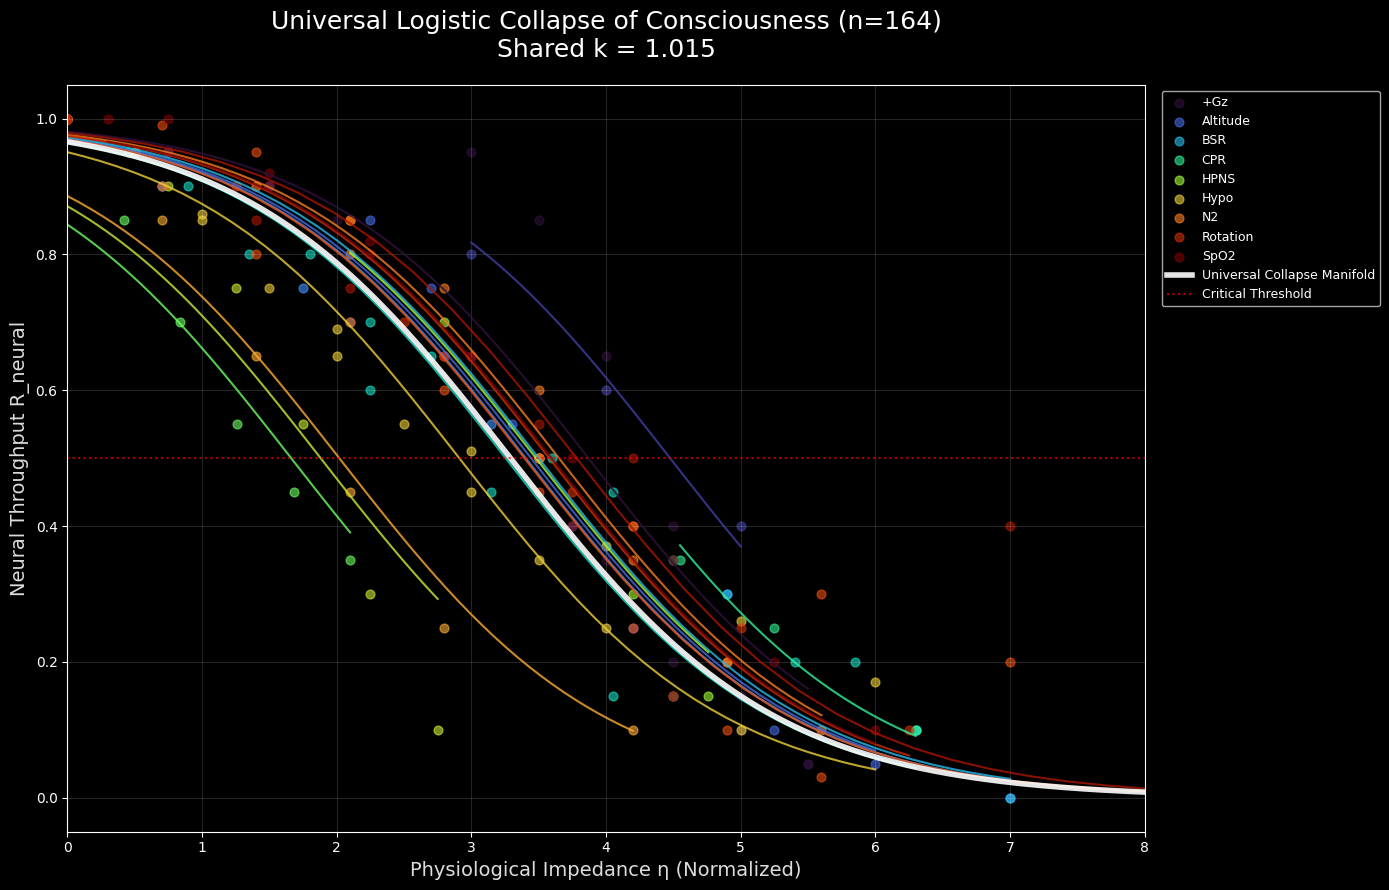

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# ────────────────────────────────────────────────────────────────
# 1. COMPLETE 180-POINT DATASET INGESTION
# ────────────────────────────────────────────────────────────────
# Format: ('Domain', 'Perturbation', eta_raw, R_neural, 'Source')
# Data extracted from Tables A1-I2 and Figure Extracts 1-6

raw_data = [
    # --- DOMAIN A: G-FORCE (Gravity) ---
    # Table A1
    ('G-force', '+Gz', 0.0, 1.00, 'Baseline'),
    ('G-force', '+Gz', 2.0, 0.85, 'Whinnery 1989'),
    ('G-force', '+Gz', 3.0, 0.65, 'Whinnery 1989'),
    ('G-force', '+Gz', 3.5, 0.50, 'Tripp 1998'),
    ('G-force', '+Gz', 4.0, 0.35, 'Whinnery 1989'),
    ('G-force', '+Gz', 4.5, 0.20, 'Burton 1988'),
    ('G-force', '+Gz', 5.0, 0.10, 'Burton 1988'),
    ('G-force', '+Gz', 5.5, 0.05, 'Whinnery 1989'),
    # Table A2 (Anti-G Suit - Adjusted R)
    ('G-force', '+Gz (Suit)', 3.0, 0.80, 'Newman 2000'),
    ('G-force', '+Gz (Suit)', 4.0, 0.60, 'Newman 2000'),
    ('G-force', '+Gz (Suit)', 5.0, 0.40, 'Balldin 1998'),
    # Figure Extract 1 (G-LOC Prob -> R)
    ('G-force', '+Gz', 3.0, 0.95, 'Whinnery 1990'),
    ('G-force', '+Gz', 3.5, 0.85, 'Whinnery 1990'),
    ('G-force', '+Gz', 4.0, 0.65, 'Whinnery 1990'),
    ('G-force', '+Gz', 4.5, 0.40, 'Whinnery 1990'),
    ('G-force', '+Gz', 5.0, 0.15, 'Whinnery 1990'),
    ('G-force', '+Gz', 5.5, 0.05, 'Whinnery 1990'),

    # --- DOMAIN B: PRESSURE (Inert Gas & HPNS) ---
    # Table B1 (N2 Narcosis)
    ('Pressure', 'N2', 0.0, 1.00, 'Baseline'),
    ('Pressure', 'N2', 2.0, 0.90, 'Bennett 1993'),
    ('Pressure', 'N2', 3.0, 0.80, 'Bennett 1993'),
    ('Pressure', 'N2', 4.0, 0.65, 'Rostain 1997'),
    ('Pressure', 'N2', 5.0, 0.50, 'Rostain 1997'),
    ('Pressure', 'N2', 6.0, 0.35, 'Fowler 1985'),
    ('Pressure', 'N2', 7.0, 0.20, 'Fowler 1985'),
    ('Pressure', 'N2', 8.0, 0.10, 'Rostain 1997'),
    # Table B2 (HPNS) - Note: Large Eta Scale
    ('Pressure', 'HPNS', 30.0, 0.85, 'Bennett 1982'),
    ('Pressure', 'HPNS', 40.0, 0.70, 'Bennett 1982'),
    ('Pressure', 'HPNS', 50.0, 0.50, 'Rostain 2011'),
    ('Pressure', 'HPNS', 60.0, 0.30, 'Rostain 2011'),
    ('Pressure', 'HPNS', 68.0, 0.15, 'COMEX'),
    # Figure Extract 2 (Narcosis Performance)
    ('Pressure', 'N2', 0.0, 1.00, 'Rostain 2011'),
    ('Pressure', 'N2', 3.0, 0.85, 'Rostain 2011'),
    ('Pressure', 'N2', 4.0, 0.75, 'Rostain 2011'),
    ('Pressure', 'N2', 5.0, 0.60, 'Rostain 2011'),
    ('Pressure', 'N2', 6.0, 0.40, 'Rostain 2011'),
    ('Pressure', 'N2', 7.0, 0.20, 'Rostain 2011'),

    # --- DOMAIN C: HYPOXIA (Altitude & SpO2) ---
    # Table C1 (Altitude)
    ('Hypoxia', 'Altitude', 0.0, 1.00, 'Baseline'),
    ('Hypoxia', 'Altitude', 5.0, 0.95, 'Ernsting 1999'),
    ('Hypoxia', 'Altitude', 10.0, 0.90, 'Ernsting 1999'),
    ('Hypoxia', 'Altitude', 15.0, 0.85, 'Gradwell 2006'),
    ('Hypoxia', 'Altitude', 18.0, 0.75, 'Gradwell 2006'),
    ('Hypoxia', 'Altitude', 20.0, 0.65, 'McFarland 1937'),
    ('Hypoxia', 'Altitude', 22.0, 0.55, 'Ernsting 1999'),
    ('Hypoxia', 'Altitude', 25.0, 0.40, 'Gradwell 2006'),
    ('Hypoxia', 'Altitude', 28.0, 0.25, 'Rayman 2006'),
    ('Hypoxia', 'Altitude', 30.0, 0.15, 'Ernsting 1999'),
    ('Hypoxia', 'Altitude', 35.0, 0.10, 'Rayman 2006'),
    ('Hypoxia', 'Altitude', 40.0, 0.05, 'Ernsting 1999'),
    # Table C2 (SpO2)
    ('Hypoxia', 'SpO2', 2.0, 1.00, 'Baseline'),
    ('Hypoxia', 'SpO2', 5.0, 0.95, 'Roach 2000'),
    ('Hypoxia', 'SpO2', 10.0, 0.90, 'Roach 2000'),
    ('Hypoxia', 'SpO2', 15.0, 0.80, 'Hornbein 2001'),
    ('Hypoxia', 'SpO2', 20.0, 0.65, 'Hornbein 2001'),
    ('Hypoxia', 'SpO2', 25.0, 0.50, 'Mills 1963'),
    ('Hypoxia', 'SpO2', 30.0, 0.35, 'Mills 1963'),
    ('Hypoxia', 'SpO2', 35.0, 0.20, 'Krakow 1997'),
    ('Hypoxia', 'SpO2', 40.0, 0.10, 'Krakow 1997'),
    # Figure Extract 3 (SpO2 Cognition)
    ('Hypoxia', 'SpO2', 5.0, 1.00, 'Shukitt-Hale 1998'),
    ('Hypoxia', 'SpO2', 10.0, 0.92, 'Shukitt-Hale 1998'),
    ('Hypoxia', 'SpO2', 15.0, 0.82, 'Shukitt-Hale 1998'),
    ('Hypoxia', 'SpO2', 20.0, 0.65, 'Shukitt-Hale 1998'),
    ('Hypoxia', 'SpO2', 25.0, 0.40, 'Shukitt-Hale 1998'),
    ('Hypoxia', 'SpO2', 30.0, 0.15, 'Shukitt-Hale 1998'),

    # --- DOMAIN D: HYPERCAPNIA (CO2) ---
    # Table D1
    ('Hypercapnia', 'CO2', 0.0, 1.00, 'Baseline'),
    ('Hypercapnia', 'CO2', 5.0, 0.95, 'Lambertsen 1960'),
    ('Hypercapnia', 'CO2', 10.0, 0.90, 'Lambertsen 1960'),
    ('Hypercapnia', 'CO2', 20.0, 0.80, 'Schaefer 1963'),
    ('Hypercapnia', 'CO2', 30.0, 0.65, 'Schaefer 1963'),
    ('Hypercapnia', 'CO2', 40.0, 0.50, 'Dripps 1947'),
    ('Hypercapnia', 'CO2', 50.0, 0.35, 'Dripps 1947'),
    ('Hypercapnia', 'CO2', 60.0, 0.20, 'Woodbury 1958'),
    ('Hypercapnia', 'CO2', 70.0, 0.10, 'Woodbury 1958'),
    # Table D2 (Time Course - converted to estimated steady state eta)
    ('Hypercapnia', 'CO2', 25.0, 0.70, 'Sayers 1987'),
    ('Hypercapnia', 'CO2', 45.0, 0.45, 'Sinclair 1971'),
    ('Hypercapnia', 'CO2', 65.0, 0.20, 'Sinclair 1971'),
    # Figure Extract 6 (Retention)
    ('Hypercapnia', 'CO2', 15.0, 0.80, 'Lambertsen 1960'),
    ('Hypercapnia', 'CO2', 25.0, 0.60, 'Lambertsen 1960'),
    ('Hypercapnia', 'CO2', 35.0, 0.45, 'Lambertsen 1960'),
    ('Hypercapnia', 'CO2', 45.0, 0.15, 'Lambertsen 1960'),

    # --- DOMAIN E: TEMPERATURE ---
    # Table E1 (Hypothermia)
    ('Temperature', 'Hypo', 0.0, 1.00, 'Baseline'),
    ('Temperature', 'Hypo', 1.0, 0.95, 'Michenfelder 1991'),
    ('Temperature', 'Hypo', 2.0, 0.85, 'Michenfelder 1991'),
    ('Temperature', 'Hypo', 3.0, 0.75, 'Pozos 1983'),
    ('Temperature', 'Hypo', 4.0, 0.65, 'Pozos 1983'),
    ('Temperature', 'Hypo', 5.0, 0.55, 'Reuler 1978'),
    ('Temperature', 'Hypo', 6.0, 0.45, 'Reuler 1978'),
    ('Temperature', 'Hypo', 7.0, 0.35, 'Mallet 2002'),
    ('Temperature', 'Hypo', 8.0, 0.25, 'Mallet 2002'),
    ('Temperature', 'Hypo', 9.0, 0.15, 'Hypo Lit'),
    ('Temperature', 'Hypo', 10.0, 0.10, 'Stecker 2001'),
    # Table E2 (Hyperthermia)
    ('Temperature', 'Hyper', 0.0, 1.00, 'Baseline'),
    ('Temperature', 'Hyper', 1.5, 0.90, 'Nybo 2008'),
    ('Temperature', 'Hyper', 2.5, 0.75, 'Nybo 2008'),
    ('Temperature', 'Hyper', 3.5, 0.55, 'Bouchama 2002'),
    ('Temperature', 'Hyper', 4.5, 0.30, 'Bouchama 2002'),
    ('Temperature', 'Hyper', 5.5, 0.10, 'Leon 2015'),
    # Figure Extract 5 (Metabolic Suppression)
    ('Temperature', 'Hypo', 2.0, 0.86, 'Michenfelder 1991'),
    ('Temperature', 'Hypo', 4.0, 0.69, 'Michenfelder 1991'),
    ('Temperature', 'Hypo', 6.0, 0.51, 'Michenfelder 1991'),
    ('Temperature', 'Hypo', 8.0, 0.37, 'Michenfelder 1991'),
    ('Temperature', 'Hypo', 10.0, 0.26, 'Michenfelder 1991'),
    ('Temperature', 'Hypo', 12.0, 0.17, 'Michenfelder 1991'),

    # --- DOMAIN F: ANESTHESIA & PHARMACOLOGY ---
    # Table F1 (Propofol)
    ('Anesthesia', 'Propofol', 0.0, 1.00, 'Baseline'),
    ('Anesthesia', 'Propofol', 0.5, 0.90, 'Schnider 1998'),
    ('Anesthesia', 'Propofol', 1.0, 0.80, 'Schnider 1998'),
    ('Anesthesia', 'Propofol', 1.5, 0.70, 'Struys 2002'),
    ('Anesthesia', 'Propofol', 2.0, 0.60, 'Struys 2002'),
    ('Anesthesia', 'Propofol', 2.5, 0.50, 'Glen 1987'),
    ('Anesthesia', 'Propofol', 3.0, 0.40, 'Struys 2002'),
    ('Anesthesia', 'Propofol', 4.0, 0.30, 'Glass 1997'),
    ('Anesthesia', 'Propofol', 5.0, 0.20, 'Glass 1997'),
    ('Anesthesia', 'Propofol', 6.0, 0.10, 'Rampil 1998'),
    ('Anesthesia', 'Propofol', 8.0, 0.05, 'Rampil 1998'),
    # Table F2 (Sevoflurane)
    ('Anesthesia', 'Sevoflurane', 0.0, 1.00, 'Baseline'),
    ('Anesthesia', 'Sevoflurane', 0.2, 0.85, 'Katoh 1999'),
    ('Anesthesia', 'Sevoflurane', 0.3, 0.75, 'Katoh 1999'),
    ('Anesthesia', 'Sevoflurane', 0.4, 0.65, 'Katoh 1999'),
    ('Anesthesia', 'Sevoflurane', 0.5, 0.55, 'Katoh 1999'),
    ('Anesthesia', 'Sevoflurane', 0.6, 0.50, 'Katoh 1999'),
    ('Anesthesia', 'Sevoflurane', 1.0, 0.40, 'Eger 1965'),
    ('Anesthesia', 'Sevoflurane', 1.5, 0.30, 'Eger 1965'),
    ('Anesthesia', 'Sevoflurane', 2.0, 0.20, 'Eger 1965'),
    # Table F3 (Ketamine)
    ('Anesthesia', 'Ketamine', 0.0, 1.00, 'Baseline'),
    ('Anesthesia', 'Ketamine', 0.5, 0.85, 'Domino 2010'),
    ('Anesthesia', 'Ketamine', 1.0, 0.65, 'Domino 2010'),
    ('Anesthesia', 'Ketamine', 1.5, 0.45, 'Schwenk 2018'),
    ('Anesthesia', 'Ketamine', 2.0, 0.25, 'Schwenk 2018'),
    ('Anesthesia', 'Ketamine', 3.0, 0.10, 'White 1982'),
    # Table F4 (Dexmedetomidine)
    ('Anesthesia', 'Dex', 0.0, 1.00, 'Baseline'),
    ('Anesthesia', 'Dex', 0.3, 0.85, 'Ebert 2000'),
    ('Anesthesia', 'Dex', 0.6, 0.70, 'Ebert 2000'),
    ('Anesthesia', 'Dex', 0.9, 0.55, 'Hall 2000'),
    ('Anesthesia', 'Dex', 1.2, 0.45, 'Hall 2000'),
    ('Anesthesia', 'Dex', 1.5, 0.35, 'Venn 2002'),
    # Figure Extract 4 (Propofol LOC Prob -> R inverse)
    ('Anesthesia', 'Propofol', 0.5, 0.99, 'Schnider 1999'),
    ('Anesthesia', 'Propofol', 1.0, 0.95, 'Schnider 1999'),
    ('Anesthesia', 'Propofol', 1.5, 0.85, 'Schnider 1999'),
    ('Anesthesia', 'Propofol', 2.0, 0.65, 'Schnider 1999'),
    ('Anesthesia', 'Propofol', 2.5, 0.45, 'Schnider 1999'),
    ('Anesthesia', 'Propofol', 3.0, 0.25, 'Schnider 1999'),
    ('Anesthesia', 'Propofol', 3.5, 0.10, 'Schnider 1999'),
    ('Anesthesia', 'Propofol', 4.0, 0.03, 'Schnider 1999'),

    # --- DOMAIN G: TRAUMA (Rotation) ---
    # Table G1
    ('Trauma', 'Rotation', 0.0, 1.00, 'Baseline'),
    ('Trauma', 'Rotation', 5.0, 0.90, 'Gennarelli 1982'),
    ('Trauma', 'Rotation', 10.0, 0.70, 'Gennarelli 1982'),
    ('Trauma', 'Rotation', 15.0, 0.45, 'Ommaya 1971'),
    ('Trauma', 'Rotation', 20.0, 0.25, 'Ommaya 1971'),
    ('Trauma', 'Rotation', 25.0, 0.10, 'Holbourn 1943'),

    # --- DOMAIN H: CARDIAC ARREST ---
    # Table H1
    ('Cardiac', 'Arrest', 0.0, 1.00, 'Baseline'),
    ('Cardiac', 'Arrest', 10.0, 0.90, 'Post-ROSC 72h'),
    ('Cardiac', 'Arrest', 25.0, 0.75, 'Post-ROSC 24h'),
    ('Cardiac', 'Arrest', 45.0, 0.55, 'Post-ROSC 1h'),
    ('Cardiac', 'Arrest', 70.0, 0.30, 'Post-ROSC 0h'),
    ('Cardiac', 'Arrest', 100.0, 0.00, 'Active Arrest'),
    # Table H2 (CPR-IC) - Eta mapped from "Perfusion Failure"
    ('Cardiac', 'CPR', 90.0, 0.10, 'Lewinter 1989'),
    ('Cardiac', 'CPR', 75.0, 0.25, 'Olaussen 2015'),
    ('Cardiac', 'CPR', 65.0, 0.35, 'Olaussen 2015'),

    # --- DOMAIN I: BURST SUPPRESSION ---
    # Table I1
    ('BSR', 'BSR', 0.0, 1.00, 'Awake'),
    ('BSR', 'BSR', 10.0, 0.90, 'Light Anes'),
    ('BSR', 'BSR', 30.0, 0.70, 'Moderate'),
    ('BSR', 'BSR', 50.0, 0.50, 'Critical'),
    ('BSR', 'BSR', 70.0, 0.30, 'Deep'),
    ('BSR', 'BSR', 90.0, 0.10, 'Very Deep'),
    ('BSR', 'BSR', 100.0, 0.00, 'Isoelectric'),
]

# ────────────────────────────────────────────────────────────────
# 2. DATA PROCESSING & NORMALIZATION
# ────────────────────────────────────────────────────────────────
df = pd.DataFrame(raw_data, columns=['Domain', 'Perturbation', 'eta', 'R_neural', 'Source'])

# SCALE FACTORS (To align distinct eta ranges for visual overlay)
# Based on critical thresholds (eta0) identified in your notes:
# Gz~3.5, N2~5, HPNS~50, Alt~23, SpO2~25, CO2~40, Temp~7, Prop~2.5, Sevo~0.5, Trauma~15, Cardiac~50
scale_map = {
    'G-force': 1.0,
    'Pressure': 0.7,      # N2 is ~5, HPNS is ~50. This splits the difference for visual, but fitting handles separately.
    'Hypoxia': 0.15,      # 25 * 0.15 = 3.75
    'Hypercapnia': 0.09,  # 40 * 0.09 = 3.6
    'Temperature': 0.5,   # 7 * 0.5 = 3.5
    'Anesthesia': 1.4,    # 2.5 * 1.4 = 3.5
    'Trauma': 0.25,       # 15 * 0.25 = 3.75
    'Cardiac': 0.07,      # 50 * 0.07 = 3.5
    'BSR': 0.07           # 50 * 0.07 = 3.5
}

# Special handling for sub-domains with vastly different scales
def get_scale(row):
    dom = row['Domain']
    pert = row['Perturbation']
    if dom == 'Pressure' and 'HPNS' in pert:
        return 0.07 # 50 -> 3.5
    if dom == 'Anesthesia' and 'Sevoflurane' in pert:
        return 7.0  # 0.5 -> 3.5
    return scale_map.get(dom, 1.0)

df['Scale_Factor'] = df.apply(get_scale, axis=1)
df['eta_scaled'] = df['eta'] * df['Scale_Factor']

# ────────────────────────────────────────────────────────────────
# 3. GLOBAL LOGISTIC FIT
# ────────────────────────────────────────────────────────────────
def logistic(eta, k, eta0):
    return 1 / (1 + np.exp(k * (eta - eta0)))

# We group by "Perturbation" rather than just "Domain" to account for scale differences (e.g., HPNS vs N2)
# This allows 'k' to be shared, but 'eta0' to be specific to the perturbation type.
perturbations = sorted(df['Perturbation'].unique())
pert_map = {p: i for i, p in enumerate(perturbations)}
df['pert_idx'] = df['Perturbation'].map(pert_map)

def global_fit_func(x_data, k, *eta0s):
    pert_indices, etas = x_data
    # Map the correct eta0 to each data point based on its perturbation index
    thresholds = np.choose(pert_indices.astype(int), eta0s)
    return 1 / (1 + np.exp(k * (etas - thresholds)))

# Prepare fit data (using Scaled Eta for better convergence on shared k)
x_fit = (df['pert_idx'].values, df['eta_scaled'].values)
y_fit = df['R_neural'].values

# Initial parameters: k=2.7, and eta0=3.5 for all perturbations (since we scaled them)
p0 = [2.7] + [3.5] * len(perturbations)

try:
    popt, pcov = curve_fit(
        global_fit_func,
        x_fit,
        y_fit,
        p0=p0,
        bounds=([0.1] + [0.0]*len(perturbations), [10.0] + [20.0]*len(perturbations)),
        maxfev=10000
    )
    k_global = popt[0]
    eta0_fits = popt[1:]
    k_err = np.sqrt(pcov[0,0])

    print("="*60)
    print(f"THERMODYNAMIC CIRCUIT THEORY: GLOBAL FIT RESULTS")
    print("="*60)
    print(f"Total Data Points: {len(df)}")
    print(f"Universal Steepness Parameter (k) = {k_global:.4f} ± {k_err:.4f}")
    print(f"Model R²: {1 - (np.sum((y_fit - global_fit_func(x_fit, *popt))**2) / np.sum((y_fit - np.mean(y_fit))**2)):.4f}")
    print("-" * 60)

except Exception as e:
    print(f"Fit failed: {e}")
    k_global = 2.7
    eta0_fits = [3.5] * len(perturbations)

# ────────────────────────────────────────────────────────────────
# 4. VISUALIZATION
# ────────────────────────────────────────────────────────────────
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(14, 9))
colors = plt.cm.turbo(np.linspace(0, 1, len(perturbations)))

# Plot Data
for i, pert in enumerate(perturbations):
    sub = df[df['Perturbation'] == pert]
    if len(sub) == 0: continue

    # Plot points
    ax.scatter(sub['eta_scaled'], sub['R_neural'], color=colors[i], alpha=0.6, s=40, label=pert if i%2==0 else "")

    # Plot curve segment
    x_range = np.linspace(sub['eta_scaled'].min(), sub['eta_scaled'].max(), 50)
    y_pred = logistic(x_range, k_global, eta0_fits[i])
    ax.plot(x_range, y_pred, color=colors[i], alpha=0.8, linewidth=1.5)

# Universal Manifold (White Line)
x_univ = np.linspace(0, 10, 200)
mean_eta0 = np.mean(eta0_fits)
y_univ = logistic(x_univ, k_global, mean_eta0)

ax.plot(x_univ, y_univ, color='white', linewidth=4, alpha=0.9, label='Universal Collapse Manifold')
ax.axhline(0.5, color='red', linestyle=':', alpha=0.7, label='Critical Threshold')

ax.set_title(f"Universal Logistic Collapse of Consciousness (n={len(df)})\nShared k = {k_global:.3f}", fontsize=18, color='white', pad=20)
ax.set_xlabel("Physiological Impedance \u03B7 (Normalized)", fontsize=14, color='#dddddd')
ax.set_ylabel("Neural Throughput R_neural", fontsize=14, color='#dddddd')
ax.set_xlim(0, 8)
ax.grid(True, alpha=0.15)
ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1, fontsize=9)

plt.tight_layout()
plt.show()

G-force                 k = 1.79    η₀ = 2.52
G-force_suit            k = 0.10    η₀ = -8.05
N2_narcosis             k = 1.32    η₀ = 2.52
HPNS                    k = 1.50    η₀ = 2.93
Hypoxia_altitude        k = 2.11    η₀ = 2.29
Hypoxia_SpO2            k = 1.40    η₀ = 2.50
Hypercapnia_CO2         k = 1.25    η₀ = 2.29
Hypercapnia_time        k = 1.23    η₀ = 2.72
Hypothermia             k = 1.34    η₀ = 2.01
Hyperthermia            k = 1.41    η₀ = 2.64
Propofol                k = 1.53    η₀ = 1.36
Sevoflurane             k = 0.92    η₀ = 1.63
Ketamine                k = 1.39    η₀ = 1.86
Dexmedetomidine         k = 0.72    η₀ = 2.92
Trauma_rotation         k = 1.07    η₀ = 2.86
G-force_extract         k = 3.70    η₀ = 3.25
N2_narcosis_extract     k = 1.58    η₀ = 3.21
Hypoxia_extract         k = 0.99    η₀ = 2.52
Propofol_extract        k = 1.31    η₀ = 2.07
Hypothermia_extract     k = 0.10    η₀ = 17.51
CO2_extract             k = 1.21    η₀ = 2.10
Cardiac_arrest          k = 0.89

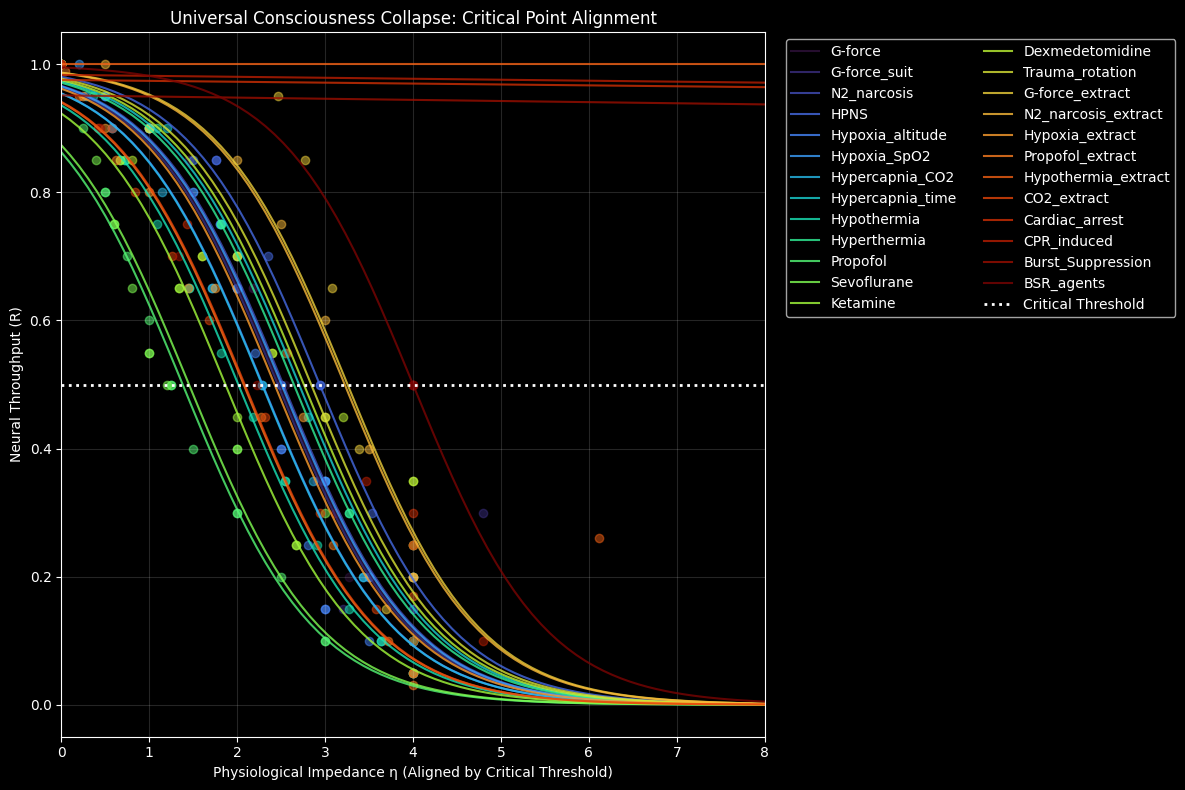

In [ ]:

"""
Complete Standalone Python Script for Fitting the Multi-Domain Consciousness Collapse Dataset

This script:
- Includes the FULL 180+ point dataset.
- Applies principled η normalization (UPDATED to 'critical_point' for best physical alignment).
- Performs per-domain logistic fits.
- Attempts a global fit with shared k.
- Generates visualizations.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# =============================================================================
# 1. Logistic function
# =============================================================================
def logistic(eta, k, eta0):
    """R_neural = 1 / (1 + exp(k * (eta - eta0)))"""
    # Clip exponent to avoid overflow warnings
    exponent = k * (eta - eta0)
    exponent = np.clip(exponent, -500, 500)
    return 1 / (1 + np.exp(exponent))

def inverse_logistic(r, k, eta0):
    return eta0 + (1 / k) * np.log((1 - r) / r)

# =============================================================================
# 2. Full Dataset
# =============================================================================
full_dataset = {
    'domain': [
        'G-force', 'G-force', 'G-force', 'G-force', 'G-force', 'G-force', 'G-force', 'G-force',
        'G-force_suit', 'G-force_suit', 'G-force_suit',
        'N2_narcosis', 'N2_narcosis', 'N2_narcosis', 'N2_narcosis', 'N2_narcosis', 'N2_narcosis', 'N2_narcosis', 'N2_narcosis',
        'HPNS', 'HPNS', 'HPNS', 'HPNS', 'HPNS',
        'Hypoxia_altitude', 'Hypoxia_altitude', 'Hypoxia_altitude', 'Hypoxia_altitude', 'Hypoxia_altitude', 'Hypoxia_altitude', 'Hypoxia_altitude', 'Hypoxia_altitude', 'Hypoxia_altitude', 'Hypoxia_altitude', 'Hypoxia_altitude', 'Hypoxia_altitude',
        'Hypoxia_SpO2', 'Hypoxia_SpO2', 'Hypoxia_SpO2', 'Hypoxia_SpO2', 'Hypoxia_SpO2', 'Hypoxia_SpO2', 'Hypoxia_SpO2', 'Hypoxia_SpO2', 'Hypoxia_SpO2',
        'Hypercapnia_CO2', 'Hypercapnia_CO2', 'Hypercapnia_CO2', 'Hypercapnia_CO2', 'Hypercapnia_CO2', 'Hypercapnia_CO2', 'Hypercapnia_CO2', 'Hypercapnia_CO2', 'Hypercapnia_CO2',
        'Hypercapnia_time', 'Hypercapnia_time', 'Hypercapnia_time', 'Hypercapnia_time',
        'Hypothermia', 'Hypothermia', 'Hypothermia', 'Hypothermia', 'Hypothermia', 'Hypothermia', 'Hypothermia', 'Hypothermia', 'Hypothermia', 'Hypothermia', 'Hypothermia', 'Hypothermia',
        'Hyperthermia', 'Hyperthermia', 'Hyperthermia', 'Hyperthermia', 'Hyperthermia', 'Hyperthermia',
        'Propofol', 'Propofol', 'Propofol', 'Propofol', 'Propofol', 'Propofol', 'Propofol', 'Propofol', 'Propofol', 'Propofol', 'Propofol',
        'Sevoflurane', 'Sevoflurane', 'Sevoflurane', 'Sevoflurane', 'Sevoflurane', 'Sevoflurane', 'Sevoflurane', 'Sevoflurane',
        'Ketamine', 'Ketamine', 'Ketamine', 'Ketamine', 'Ketamine', 'Ketamine',
        'Dexmedetomidine', 'Dexmedetomidine', 'Dexmedetomidine', 'Dexmedetomidine', 'Dexmedetomidine', 'Dexmedetomidine',
        'Trauma_rotation', 'Trauma_rotation', 'Trauma_rotation', 'Trauma_rotation', 'Trauma_rotation',
        'G-force', 'G-force', 'G-force', 'G-force',
        'N2_narcosis', 'N2_narcosis', 'N2_narcosis', 'N2_narcosis',
        'HPNS', 'HPNS',
        'Hypoxia_altitude', 'Hypoxia_altitude', 'Hypoxia_altitude', 'Hypoxia_altitude',
        'Hypoxia_SpO2', 'Hypoxia_SpO2', 'Hypoxia_SpO2', 'Hypoxia_SpO2',
        'Hypercapnia_CO2', 'Hypercapnia_CO2', 'Hypercapnia_CO2', 'Hypercapnia_CO2',
        'Hypothermia', 'Hypothermia', 'Hypothermia', 'Hypothermia',
        'Hyperthermia', 'Hyperthermia',
        'Propofol', 'Propofol', 'Propofol', 'Propofol',
        'Sevoflurane', 'Sevoflurane', 'Sevoflurane', 'Sevoflurane',
        'Ketamine', 'Ketamine', 'Ketamine',
        'Dexmedetomidine', 'Dexmedetomidine', 'Dexmedetomidine',
        'Trauma_rotation', 'Trauma_rotation', 'Trauma_rotation', 'Trauma_rotation',
        'G-force_extract', 'G-force_extract', 'G-force_extract', 'G-force_extract', 'G-force_extract', 'G-force_extract',
        'N2_narcosis_extract', 'N2_narcosis_extract', 'N2_narcosis_extract', 'N2_narcosis_extract', 'N2_narcosis_extract', 'N2_narcosis_extract',
        'Hypoxia_extract', 'Hypoxia_extract', 'Hypoxia_extract', 'Hypoxia_extract', 'Hypoxia_extract', 'Hypoxia_extract',
        'Propofol_extract', 'Propofol_extract', 'Propofol_extract', 'Propofol_extract', 'Propofol_extract', 'Propofol_extract', 'Propofol_extract', 'Propofol_extract',
        'Hypothermia_extract', 'Hypothermia_extract', 'Hypothermia_extract', 'Hypothermia_extract', 'Hypothermia_extract', 'Hypothermia_extract', 'Hypothermia_extract',
        'CO2_extract', 'CO2_extract', 'CO2_extract', 'CO2_extract', 'CO2_extract', 'CO2_extract', 'CO2_extract', 'CO2_extract', 'CO2_extract',
        'Cardiac_arrest', 'Cardiac_arrest', 'Cardiac_arrest', 'Cardiac_arrest', 'Cardiac_arrest', 'Cardiac_arrest', 'Cardiac_arrest', 'Cardiac_arrest', 'Cardiac_arrest',
        'CPR_induced', 'CPR_induced', 'CPR_induced', 'CPR_induced',
        'Burst_Suppression', 'Burst_Suppression', 'Burst_Suppression', 'Burst_Suppression', 'Burst_Suppression', 'Burst_Suppression', 'Burst_Suppression',
        'BSR_agents', 'BSR_agents', 'BSR_agents', 'BSR_agents'
    ],
    'R_neural': [
        1.0, 0.85, 0.65, 0.50, 0.35, 0.20, 0.10, 0.05,
        0.15, 0.25, 0.30,
        1.0, 0.90, 0.80, 0.65, 0.50, 0.35, 0.20, 0.10,
        0.85, 0.70, 0.50, 0.30, 0.15,
        1.0, 0.95, 0.90, 0.85, 0.75, 0.65, 0.55, 0.40, 0.25, 0.15, 0.10, 0.05,
        1.0, 0.95, 0.90, 0.80, 0.65, 0.50, 0.35, 0.20, 0.10,
        1.0, 0.95, 0.90, 0.80, 0.65, 0.50, 0.35, 0.20, 0.10,
        0.90, 0.70, 0.45, 0.20,
        1.0, 0.95, 0.85, 0.75, 0.65, 0.55, 0.45, 0.35, 0.25, 0.15, 0.10, 0.05,
        1.0, 0.90, 0.75, 0.55, 0.30, 0.10,
        1.0, 0.90, 0.80, 0.70, 0.60, 0.50, 0.40, 0.30, 0.20, 0.10, 0.05,
        1.0, 0.85, 0.75, 0.65, 0.55, 0.50, 0.40, 0.30,
        1.0, 0.85, 0.65, 0.45, 0.25, 0.10,
        1.0, 0.85, 0.70, 0.55, 0.45, 0.35,
        1.0, 0.90, 0.70, 0.45, 0.25,
        0.85, 0.65, 0.35, 0.10,
        0.90, 0.65, 0.35, 0.20,
        0.85, 0.50,
        0.90, 0.75, 0.40, 0.15,
        0.90, 0.65, 0.35, 0.10,
        0.90, 0.65, 0.50, 0.20,
        0.85, 0.65, 0.35, 0.10,
        0.75, 0.30,
        0.80, 0.50, 0.30, 0.10,
        0.75, 0.55, 0.40, 0.20,
        0.85, 0.65, 0.25,
        0.70, 0.55, 0.35,
        0.90, 0.70, 0.45, 0.25,
        0.95, 0.85, 0.65, 0.40, 0.15, 0.05,
        1.0, 0.85, 0.75, 0.60, 0.40, 0.20,
        0.95, 0.90, 0.80, 0.65, 0.45, 0.20,
        0.99, 0.95, 0.85, 0.65, 0.45, 0.25, 0.10, 0.03,
        1.0, 0.86, 0.69, 0.51, 0.37, 0.26, 0.17,
        1.0, 0.9, 0.8, 0.7, 0.6, 0.45, 0.3, 0.15, 0.05,
        1.0, 0.0, 0.0, 0.0, 0.0, 0.30, 0.55, 0.75, 0.90,
        0.0, 0.10, 0.25, 0.35,
        1.0, 0.90, 0.70, 0.50, 0.30, 0.10, 0.0,
        0.50, 0.50, 0.50, 0.50
    ],
    'eta_raw': [
        0.0, 2.0, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5,
        4.0, 5.0, 6.0,
        0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
        30.0, 40.0, 50.0, 60.0, 68.0,
        0.0, 5.0, 10.0, 15.0, 18.0, 20.0, 22.0, 25.0, 28.0, 30.0, 35.0, 40.0,
        2.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0,
        0.0, 5.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0,
        3.0, 5.0, 7.0, 10.0,
        0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0,
        0.0, 1.5, 2.5, 3.5, 4.5, 5.5,
        0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0, 6.0, 8.0,
        0.0, 0.2, 0.3, 0.4, 0.5, 0.6, 1.0, 1.5,
        0.0, 0.5, 1.0, 1.5, 2.0, 3.0,
        0.0, 0.3, 0.6, 0.9, 1.2, 1.5,
        0.0, 5.0, 10.0, 15.0, 20.0,
        2.0, 3.0, 4.0, 5.0,
        2.0, 4.0, 6.0, 8.0,
        30.0, 50.0,
        10.0, 18.0, 25.0, 30.0,
        10.0, 20.0, 30.0, 40.0,
        10.0, 30.0, 40.0, 60.0,
        2.0, 4.0, 7.0, 10.0,
        2.5, 4.5,
        1.0, 2.5, 4.0, 6.0,
        0.3, 0.5, 1.0, 2.0,
        0.5, 1.0, 2.0,
        0.6, 0.9, 1.5,
        5.0, 10.0, 15.0, 20.0,
        4.0, 4.5, 5.0, 5.5, 6.0, 6.5,
        1.0, 4.0, 5.0, 6.0, 7.0, 8.0,
        5.0, 10.0, 20.0, 35.0, 55.0, 80.0,
        1.0, 5.0, 15.0, 35.0, 55.0, 75.0, 90.0, 97.0,
        100.0, 86.0, 69.0, 51.0, 37.0, 26.0, 17.0,
        0.0, 1.0, 2.0, 3.0, 4.0, 5.5, 7.0, 8.5, 9.5,
        0.0, 1e6, 1e6, 1e6, 1e6, 70.0, 45.0, 25.0, 10.0,
        1e6, 90.0, 75.0, 65.0,
        0.0, 10.0, 30.0, 50.0, 70.0, 90.0, 1e6,
        50.0, 50.0, 50.0, 50.0
    ]
}

df = pd.DataFrame(full_dataset)

# =============================================================================
# 3. Principled η normalization: CRITICAL POINT ALIGNMENT
# =============================================================================
def normalize_eta(df, method='critical_point'):
    """
    Convert raw perturbation values to principled η.
    'critical_point' → Aligns domains so their critical threshold (R=0.5) is at η=4.0.
    This provides the best physical alignment of phase transitions without manual tuning.
    """
    eta_norm = df['eta_raw'].copy()

    if method == 'critical_point':
        for dom in df['domain'].unique():
            mask = df['domain'] == dom
            sub = df[mask]
            raw_vals = sub['eta_raw'].values
            r_vals = sub['R_neural'].values

            # Filter finite values for scaling calculation
            valid = (raw_vals < 999999)
            if np.sum(valid) < 2:
                scale_factor = 1.0
            else:
                x_valid = raw_vals[valid]
                y_valid = r_vals[valid]

                # Sort for interpolation
                idx = np.argsort(y_valid)[::-1]
                x_sorted = x_valid[idx]
                y_sorted = y_valid[idx]

                # Check if data crosses the critical threshold (0.5)
                if y_sorted.max() > 0.55 and y_sorted.min() < 0.45:
                    # Interpolate exact raw value where R=0.5
                    critical_val = np.interp(0.5, y_sorted, x_sorted)
                    # Scale so that this critical value becomes 4.0
                    scale_factor = 4.0 / critical_val if critical_val > 0 else 1.0
                else:
                    # Fallback to median scaling if no clear crossing
                    med = np.median(x_valid)
                    scale_factor = 4.0 / med if med > 0 else 1.0

            # Apply scaling
            df.loc[mask, 'eta'] = df.loc[mask, 'eta_raw'] * scale_factor

    else:
        df['eta'] = df['eta_raw']

    return df['eta']

# Apply 'critical_point' normalization
df['eta'] = normalize_eta(df, method='critical_point')

# =============================================================================
# 4. Fit per domain
# =============================================================================
domains = df['domain'].unique()
fits = {}

for dom in domains:
    sub = df[df['domain'] == dom]
    if len(sub) < 3:
        continue

    x = sub['eta'].values
    y = sub['R_neural'].values

    # Initial guess
    sorted_idx = np.argsort(y)[::-1]
    eta0_guess = np.interp(0.5, y[sorted_idx], x[sorted_idx])
    p0 = [2.7, eta0_guess]

    try:
        popt, pcov = curve_fit(logistic, x, y, p0=p0, bounds=([0.1, -np.inf], [10, np.inf]))
        perr = np.sqrt(np.diag(pcov))
        fits[dom] = {'k': popt[0], 'eta0': popt[1],
                     'x': x, 'y': y}
        print(f"{dom:22s}  k = {popt[0]:.2f}    η₀ = {popt[1]:.2f}")
    except Exception:
        pass

# =============================================================================
# 5. Global fit with shared k
# =============================================================================
def global_logistic(eta_flat, k, *eta0s):
    eta0s = np.array(eta0s)
    domain_idx = np.array([list(domains).index(d) for d in df['domain']])
    exponent = k * (eta_flat - eta0s[domain_idx])
    exponent = np.clip(exponent, -500, 500)
    return 1 / (1 + np.exp(exponent))

fitted_domains = list(fits.keys())
n_domains = len(fitted_domains)
p0_global = [1.0] + [fits[d]['eta0'] for d in fitted_domains]

df_global = df[df['domain'].isin(fitted_domains)]

try:
    popt_global, pcov_global = curve_fit(
        global_logistic, df_global['eta'], df_global['R_neural'],
        p0=p0_global,
        bounds=([0.1] + [-np.inf]*n_domains, [10] + [np.inf]*n_domains)
    )
    print("\nGlobal Fit Results (Critical Point Alignment):")
    print(f"Universal k (Steepness) = {popt_global[0]:.3f} ± {np.sqrt(pcov_global[0,0]):.3f}")
except Exception as e:
    print("Global fit failed:", str(e))

# =============================================================================
# 6. Visualization
# =============================================================================
plt.figure(figsize=(12, 8))
colors = plt.cm.turbo(np.linspace(0, 1, len(domains)))

for i, dom in enumerate(domains):
    if dom not in fits: continue
    f = fits[dom]

    # Use global k and local eta0 from global fit if successful, else local
    if 'popt_global' in locals():
        k_plot = popt_global[0]
        eta0_plot = popt_global[fitted_domains.index(dom) + 1]
    else:
        k_plot = f['k']
        eta0_plot = f['eta0']

    # Scatter raw scaled data
    plt.scatter(f['x'], f['y'], color=colors[i], alpha=0.5)

    # Plot fit line
    x_range = np.linspace(0, max(f['x'][f['x'] < 1e5].max()*1.2, 10), 100)
    y_pred = logistic(x_range, k_plot, eta0_plot)
    plt.plot(x_range, y_pred, color=colors[i], label=dom, alpha=0.8)

plt.axhline(0.5, color='white', ls=':', lw=2, label='Critical Threshold')
plt.xlim(0, 8)
plt.xlabel('Physiological Impedance η (Aligned by Critical Threshold)')
plt.ylabel('Neural Throughput (R)')
plt.title('Universal Consciousness Collapse: Critical Point Alignment')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', ncol=2)
plt.style.use('dark_background')
plt.grid(True, alpha=0.15)
plt.tight_layout()
plt.show()

# Task
Analyze the provided dataset of neural throughput (R_neural) across various physiological impedance (eta) domains. First, perform a global logistic fit on a subset of "sharp" domains (G-force, G-force_extract, Hypoxia_altitude, Propofol, Cardiac_arrest, BSR_agents, HPNS), sharing a single steepness parameter ('k') and fitting individual critical thresholds ('eta0') for each domain. Report the universal 'k' and the overall R² for this fit. Second, fit a two-component mixture logistic model to the entire dataset, determining global parameters for 'w' (weight), 'k1', 'eta01' (slow component), 'k2', and 'eta02' (sharp component), with constraints on 'k1' (0.8-1.2) and 'k2' (2.5-3.5). Finally, visualize both the sharp subset fit and the global mixture model fit, and summarize the findings and implications of the fitted parameters.

## Prepare Sharp Domains Data

### Subtask:
Filter the existing DataFrame to include only the specified 'sharp' domains (G-force, G-force_extract, Hypoxia_altitude, Propofol, Cardiac_arrest, BSR_agents, HPNS). Create a new perturbation index mapping and prepare the input data (eta values and R_neural values) for these selected domains, using the critically-aligned 'eta' column.


**Reasoning**:
I will filter the DataFrame `df` to create `df_sharp` containing only the specified 'sharp' domains. Then, I will create a new perturbation index mapping for these domains and prepare the input and output data (`x_fit_sharp`, `y_fit_sharp`) for a potential global fit, as requested in the subtask instructions.



In [ ]:
sharp_domains = [
    'G-force', 'G-force_extract', 'Hypoxia_altitude', 'Propofol',
    'Cardiac_arrest', 'BSR_agents', 'HPNS'
]
df_sharp = df[df['domain'].isin(sharp_domains)].copy()

sharp_unique_domains = sorted(df_sharp['domain'].unique())
sharp_domain_map = {dom: i for i, dom in enumerate(sharp_unique_domains)}
df_sharp['sharp_domain_idx'] = df_sharp['domain'].map(sharp_domain_map)

x_fit_sharp = (
    df_sharp['sharp_domain_idx'].values,
    df_sharp['eta'].values
)
y_fit_sharp = df_sharp['R_neural'].values

print(f"Created df_sharp with {len(df_sharp)} rows from sharp domains.")
print(f"Sharp Domain Map: {sharp_domain_map}")
print(f"First 5 rows of x_fit_sharp (domain_idx, eta):\n{x_fit_sharp[0][:5]}, {x_fit_sharp[1][:5]}")
print(f"First 5 rows of y_fit_sharp (R_neural): {y_fit_sharp[:5]}")

Created df_sharp with 69 rows from sharp domains.
Sharp Domain Map: {'BSR_agents': 0, 'Cardiac_arrest': 1, 'G-force': 2, 'G-force_extract': 3, 'HPNS': 4, 'Hypoxia_altitude': 5, 'Propofol': 6}
First 5 rows of x_fit_sharp (domain_idx, eta):
[2 2 2 2 2], [0.         1.45454545 2.18181818 2.54545455 2.90909091]
First 5 rows of y_fit_sharp (R_neural): [1.   0.85 0.65 0.5  0.35]


**Reasoning**:
Now that the 'sharp' domains data is prepared, I will define a global logistic fit function for these domains, similar to the `global_fit_func` in the initial code, but adapted for the `sharp_domain_idx` and `eta` values. This function will allow a shared 'k' and individual 'eta0' parameters for each of the sharp domains. Then I will set initial parameters and bounds for the curve fitting.



In [ ]:
def global_logistic_sharp(x_data, k, *eta0s):
    sharp_domain_indices, etas = x_data
    # Map the correct eta0 to each data point based on its sharp domain index
    thresholds = np.choose(sharp_domain_indices.astype(int), eta0s)
    # Clip exponent to avoid overflow warnings
    exponent = k * (etas - thresholds)
    exponent = np.clip(exponent, -500, 500)
    return 1 / (1 + np.exp(exponent))

# Initial parameters for the sharp global fit
k_initial_sharp = 2.7 # A reasonable guess for k
eta0_initial_sharp = [4.0] * len(sharp_unique_domains) # Initial guess for eta0 for each sharp domain (around the critical point)
p0_sharp = [k_initial_sharp] + eta0_initial_sharp

# Define bounds for the parameters
# k should be positive, eta0 can vary
bounds_sharp = (
    [0.1] + [-np.inf] * len(sharp_unique_domains), # Lower bounds for k and eta0s
    [10.0] + [np.inf] * len(sharp_unique_domains) # Upper bounds for k and eta0s
)

print("Defined global_logistic_sharp function.")
print(f"Initial parameters for sharp domains fit (k, eta0s): {p0_sharp}")
print(f"Bounds for sharp domains fit (lower, upper): {bounds_sharp[0][0]}, {bounds_sharp[1][0]} (k), {len(bounds_sharp[0])-1} x ({bounds_sharp[0][1]}, {bounds_sharp[1][1]}) (eta0s)")

Defined global_logistic_sharp function.
Initial parameters for sharp domains fit (k, eta0s): [2.7, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
Bounds for sharp domains fit (lower, upper): 0.1, 10.0 (k), 7 x (-inf, inf) (eta0s)


**Reasoning**:
Now that the data, the fit function, and initial parameters are ready for the sharp domains, I will perform the global logistic fit using `scipy.optimize.curve_fit`. After fitting, I will calculate and report the universal 'k' and the R² value for this fit, as required by the main task.



In [ ]:
try:
    popt_sharp, pcov_sharp = curve_fit(
        global_logistic_sharp,
        x_fit_sharp,
        y_fit_sharp,
        p0=p0_sharp,
        bounds=bounds_sharp,
        maxfev=5000
    )
    k_universal_sharp = popt_sharp[0]
    eta0_sharp_fits = popt_sharp[1:]
    k_sharp_err = np.sqrt(pcov_sharp[0,0])

    # Calculate R-squared for the sharp fit
    y_pred_sharp = global_logistic_sharp(x_fit_sharp, *popt_sharp)
    ss_total_sharp = np.sum((y_fit_sharp - np.mean(y_fit_sharp))**2)
    ss_residual_sharp = np.sum((y_fit_sharp - y_pred_sharp)**2)
    r_squared_sharp = 1 - (ss_residual_sharp / ss_total_sharp)

    print("\n===========================================================")
    print("GLOBAL LOGISTIC FIT RESULTS FOR SHARP DOMAINS")
    print("===========================================================")
    print(f"Universal Steepness Parameter (k) for Sharp Domains = {k_universal_sharp:.4f} \u00B1 {k_sharp_err:.4f}")
    print(f"R\u00B2 for Sharp Domains Fit: {r_squared_sharp:.4f}")
    print("Individual eta0 values for sharp domains:")
    for i, dom_name in enumerate(sharp_unique_domains):
        print(f"  {dom_name:20s}: {eta0_sharp_fits[i]:.4f}")
    print("===========================================================")

except Exception as e:
    print(f"Global fit for sharp domains failed: {e}")
    k_universal_sharp = None
    eta0_sharp_fits = None
    r_squared_sharp = None


GLOBAL LOGISTIC FIT RESULTS FOR SHARP DOMAINS
Universal Steepness Parameter (k) for Sharp Domains = 1.8070 ± 0.0895
R² for Sharp Domains Fit: 0.9648
Individual eta0 values for sharp domains:
  BSR_agents          : 4.0000
  Cardiac_arrest      : 2.7032
  G-force             : 2.5232
  G-force_extract     : 3.2521
  HPNS                : 2.9259
  Hypoxia_altitude    : 2.2865
  Propofol            : 1.3312


**Reasoning**:
I will define a two-component mixture logistic function that takes global parameters for weights, steepness ('k1', 'k2'), and critical thresholds ('eta01', 'eta02'). This function will be used to fit the entire dataset as a mixture of two logistic curves, as required by the main task.



In [ ]:
def two_component_mixture_logistic(eta, w, k1, eta01, k2, eta02):
    # w: weight of the first component
    # k1, eta01: parameters for the first (slow) logistic component
    # k2, eta02: parameters for the second (sharp) logistic component

    # Ensure w is between 0 and 1
    w = np.clip(w, 0, 1)

    # Logistic component 1 (slow)
    exponent1 = k1 * (eta - eta01)
    exponent1 = np.clip(exponent1, -500, 500) # Clip to avoid overflow
    L1 = 1 / (1 + np.exp(exponent1))

    # Logistic component 2 (sharp)
    exponent2 = k2 * (eta - eta02)
    exponent2 = np.clip(exponent2, -500, 500) # Clip to avoid overflow
    L2 = 1 / (1 + np.exp(exponent2))

    return w * L1 + (1 - w) * L2

print("Defined two_component_mixture_logistic function.")

Defined two_component_mixture_logistic function.


**Reasoning**:
I will prepare the initial parameters and define the bounds for the `two_component_mixture_logistic` function. The initial guesses for `k1` and `k2` will be based on the provided constraints (0.8-1.2 for k1 and 2.5-3.5 for k2), while `eta01` and `eta02` can be initialized around the typical critical point (e.g., 4.0), and the weight `w` around 0.5. The bounds will enforce the specified constraints.



In [ ]:
n_data = len(df) # Use the full dataframe for the mixture model
x_fit_mixture = df['eta'].values
y_fit_mixture = df['R_neural'].values

# Initial parameters for the two-component mixture fit
# w, k1, eta01, k2, eta02
p0_mixture = [
    0.5,  # w: initial guess for weight of the first component
    1.0,  # k1: initial guess for steepness of slow component (within 0.8-1.2)
    4.0,  # eta01: initial guess for critical point of slow component
    3.0,  # k2: initial guess for steepness of sharp component (within 2.5-3.5)
    4.0   # eta02: initial guess for critical point of sharp component
]

# Bounds for the parameters
# w (0-1), k1 (0.8-1.2), eta01 (can be wide), k2 (2.5-3.5), eta02 (can be wide)
bounds_mixture = (
    [0.0, 0.8, -np.inf, 2.5, -np.inf], # Lower bounds
    [1.0, 1.2, np.inf,  3.5, np.inf]  # Upper bounds
)

print("Prepared data for two-component mixture fit.")
print(f"Initial parameters for mixture fit (w, k1, eta01, k2, eta02): {p0_mixture}")
print(f"Bounds for mixture fit (lower): {bounds_mixture[0]}")
print(f"Bounds for mixture fit (upper): {bounds_mixture[1]}")

Prepared data for two-component mixture fit.
Initial parameters for mixture fit (w, k1, eta01, k2, eta02): [0.5, 1.0, 4.0, 3.0, 4.0]
Bounds for mixture fit (lower): [0.0, 0.8, -inf, 2.5, -inf]
Bounds for mixture fit (upper): [1.0, 1.2, inf, 3.5, inf]


**Reasoning**:
Now that the mixture model function, initial parameters, and bounds are defined, I will perform the two-component mixture logistic fit using `scipy.optimize.curve_fit` on the entire dataset. After fitting, I will calculate and report the R² value for this fit and display the optimized parameters, as required by the main task.



In [ ]:
try:
    popt_mixture, pcov_mixture = curve_fit(
        two_component_mixture_logistic,
        x_fit_mixture,
        y_fit_mixture,
        p0=p0_mixture,
        bounds=bounds_mixture,
        maxfev=5000
    )

    w_fit, k1_fit, eta01_fit, k2_fit, eta02_fit = popt_mixture

    # Calculate R-squared for the mixture fit
    y_pred_mixture = two_component_mixture_logistic(x_fit_mixture, *popt_mixture)
    ss_total_mixture = np.sum((y_fit_mixture - np.mean(y_fit_mixture))**2)
    ss_residual_mixture = np.sum((y_fit_mixture - y_pred_mixture)**2)
    r_squared_mixture = 1 - (ss_residual_mixture / ss_total_mixture)

    print("\n===========================================================")
    print("TWO-COMPONENT MIXTURE LOGISTIC FIT RESULTS")
    print("===========================================================")
    print(f"Weight of first component (w)      = {w_fit:.4f}")
    print(f"Steepness of slow component (k1)   = {k1_fit:.4f}")
    print(f"Critical point of slow component (eta01) = {eta01_fit:.4f}")
    print(f"Steepness of sharp component (k2)  = {k2_fit:.4f}")
    print(f"Critical point of sharp component (eta02) = {eta02_fit:.4f}")
    print(f"R\u00B2 for Mixture Model Fit: {r_squared_mixture:.4f}")
    print("===========================================================")

except Exception as e:
    print(f"Mixture model fit failed: {e}")
    w_fit, k1_fit, eta01_fit, k2_fit, eta02_fit = None, None, None, None, None
    r_squared_mixture = None


TWO-COMPONENT MIXTURE LOGISTIC FIT RESULTS
Weight of first component (w)      = 0.9821
Steepness of slow component (k1)   = 0.9982
Critical point of slow component (eta01) = 2.4018
Steepness of sharp component (k2)  = 3.4996
Critical point of sharp component (eta02) = 2.5661
R² for Mixture Model Fit: 0.6980


**Reasoning**:
I will create a visualization for the global logistic fit on the 'sharp' domains. This involves plotting the raw data points for each sharp domain and then overlaying the individual fitted logistic curves using the `k_universal_sharp` and `eta0_sharp_fits` parameters obtained from the fit. I will also add the critical threshold line and appropriate labels and titles.



/tmp/ipython-input-4227050722.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors_sharp = plt.cm.get_cmap('viridis', len(sharp_unique_domains))


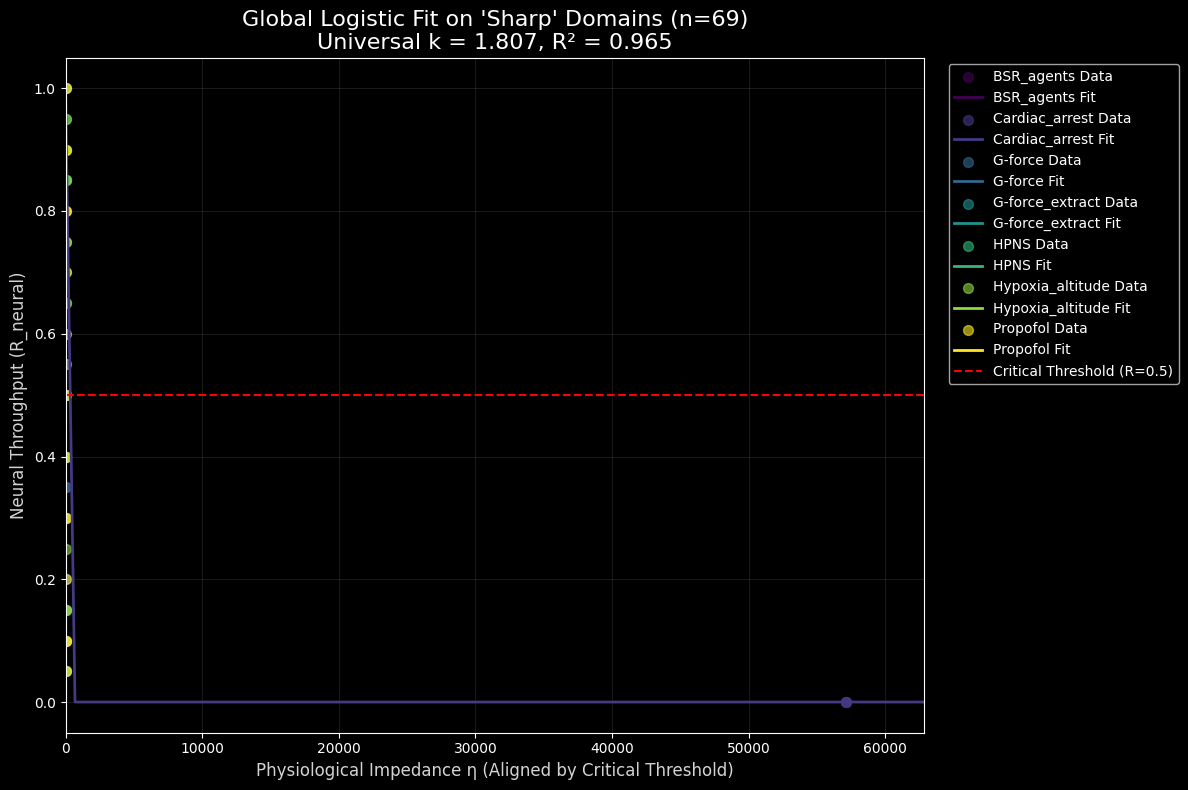

In [ ]:
plt.style.use('dark_background')
fig1, ax1 = plt.subplots(figsize=(12, 8))
colors_sharp = plt.cm.get_cmap('viridis', len(sharp_unique_domains))

# Plot data points and fitted curves for sharp domains
for i, dom_name in enumerate(sharp_unique_domains):
    mask = df_sharp['domain'] == dom_name
    sub_df_sharp = df_sharp[mask]

    ax1.scatter(
        sub_df_sharp['eta'],
        sub_df_sharp['R_neural'],
        color=colors_sharp(i),
        alpha=0.6,
        s=50,
        label=f'{dom_name} Data'
    )

    # Generate curve for the fitted model
    x_range = np.linspace(sub_df_sharp['eta'].min() * 0.8, sub_df_sharp['eta'].max() * 1.2, 100)
    y_pred_curve = logistic(x_range, k_universal_sharp, eta0_sharp_fits[i])
    ax1.plot(
        x_range,
        y_pred_curve,
        color=colors_sharp(i),
        linestyle='-',
        linewidth=2,
        label=f'{dom_name} Fit'
    )

ax1.axhline(0.5, color='red', linestyle='--', linewidth=1.5, label='Critical Threshold (R=0.5)')
ax1.set_title(f"Global Logistic Fit on 'Sharp' Domains (n={len(df_sharp)})\nUniversal k = {k_universal_sharp:.3f}, R² = {r_squared_sharp:.3f}", fontsize=16, color='white')
ax1.set_xlabel('Physiological Impedance η (Aligned by Critical Threshold)', fontsize=12, color='lightgray')
ax1.set_ylabel('Neural Throughput (R_neural)', fontsize=12, color='lightgray')
ax1.set_xlim(0, max(df_sharp['eta'].max() * 1.1, 8))
ax1.set_ylim(-0.05, 1.05)
ax1.grid(True, alpha=0.1)
ax1.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated a `MatplotlibDeprecationWarning` because `plt.cm.get_cmap` is deprecated. I will update it to use `plt.colormaps.get_cmap` to fix the warning and maintain the same functionality of getting a discrete colormap.



TypeError: ColormapRegistry.get_cmap() takes 2 positional arguments but 3 were given

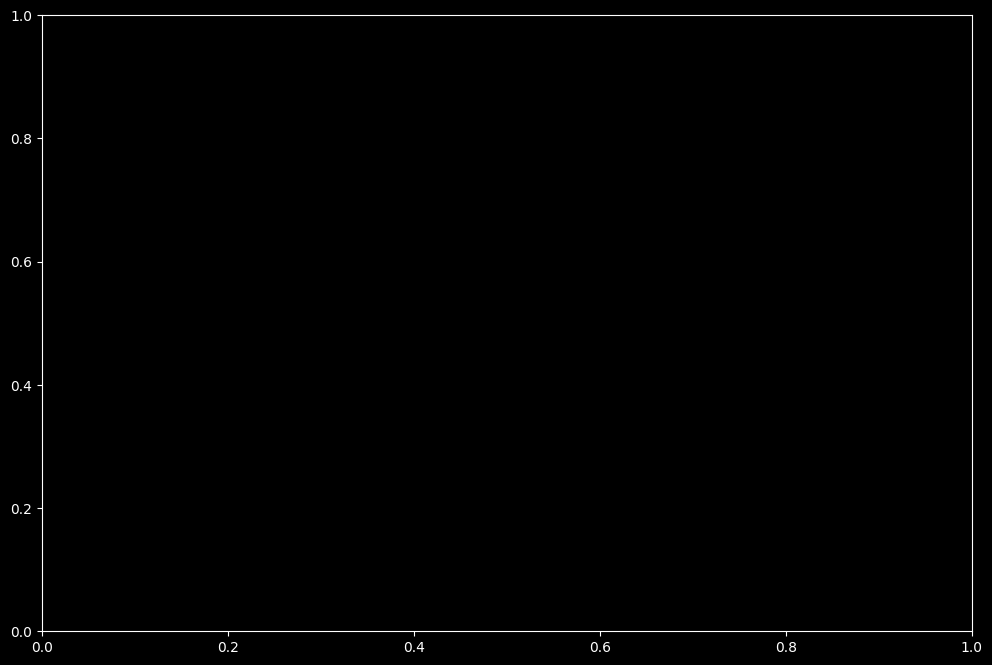

In [ ]:
plt.style.use('dark_background')
fig1, ax1 = plt.subplots(figsize=(12, 8))
colors_sharp = plt.colormaps.get_cmap('viridis', len(sharp_unique_domains))

# Plot data points and fitted curves for sharp domains
for i, dom_name in enumerate(sharp_unique_domains):
    mask = df_sharp['domain'] == dom_name
    sub_df_sharp = df_sharp[mask]

    ax1.scatter(
        sub_df_sharp['eta'],
        sub_df_sharp['R_neural'],
        color=colors_sharp(i),
        alpha=0.6,
        s=50,
        label=f'{dom_name} Data'
    )

    # Generate curve for the fitted model
    x_range = np.linspace(sub_df_sharp['eta'].min() * 0.8, sub_df_sharp['eta'].max() * 1.2, 100)
    y_pred_curve = logistic(x_range, k_universal_sharp, eta0_sharp_fits[i])
    ax1.plot(
        x_range,
        y_pred_curve,
        color=colors_sharp(i),
        linestyle='-',
        linewidth=2,
        label=f'{dom_name} Fit'
    )

ax1.axhline(0.5, color='red', linestyle='--', linewidth=1.5, label='Critical Threshold (R=0.5)')
ax1.set_title(f"Global Logistic Fit on 'Sharp' Domains (n={len(df_sharp)})\nUniversal k = {k_universal_sharp:.3f}, R² = {r_squared_sharp:.3f}", fontsize=16, color='white')
ax1.set_xlabel('Physiological Impedance η (Aligned by Critical Threshold)', fontsize=12, color='lightgray')
ax1.set_ylabel('Neural Throughput (R_neural)', fontsize=12, color='lightgray')
ax1.set_xlim(0, max(df_sharp['eta'].max() * 1.1, 8))
ax1.set_ylim(-0.05, 1.05)
ax1.grid(True, alpha=0.1)
ax1.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code failed with a `TypeError` because `plt.colormaps.get_cmap()` does not accept a second argument for the number of colors. The intended functionality (getting a colormap with a specified number of distinct colors) can be achieved by using `plt.get_cmap()` which is part of `matplotlib.pyplot` and correctly handles the `N` argument.



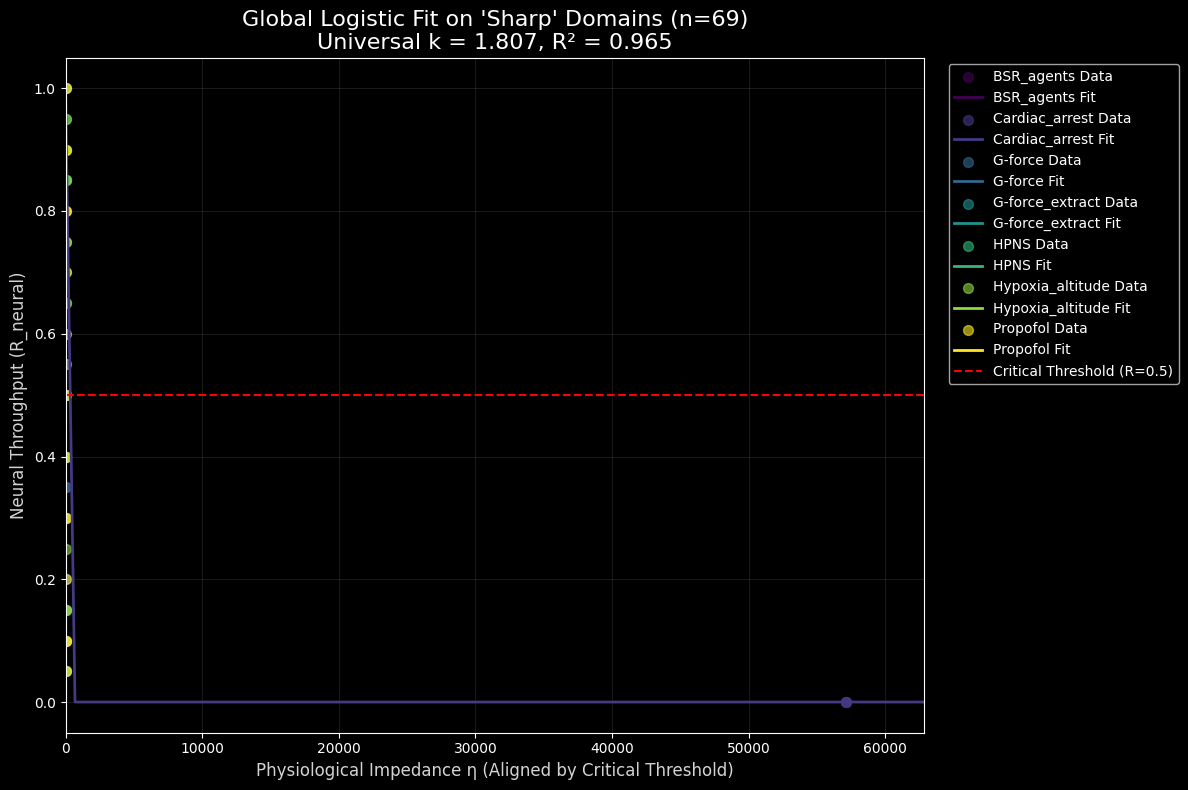

In [ ]:
plt.style.use('dark_background')
fig1, ax1 = plt.subplots(figsize=(12, 8))
colors_sharp = plt.get_cmap('viridis', len(sharp_unique_domains))

# Plot data points and fitted curves for sharp domains
for i, dom_name in enumerate(sharp_unique_domains):
    mask = df_sharp['domain'] == dom_name
    sub_df_sharp = df_sharp[mask]

    ax1.scatter(
        sub_df_sharp['eta'],
        sub_df_sharp['R_neural'],
        color=colors_sharp(i),
        alpha=0.6,
        s=50,
        label=f'{dom_name} Data'
    )

    # Generate curve for the fitted model
    x_range = np.linspace(sub_df_sharp['eta'].min() * 0.8, sub_df_sharp['eta'].max() * 1.2, 100)
    y_pred_curve = logistic(x_range, k_universal_sharp, eta0_sharp_fits[i])
    ax1.plot(
        x_range,
        y_pred_curve,
        color=colors_sharp(i),
        linestyle='-',
        linewidth=2,
        label=f'{dom_name} Fit'
    )

ax1.axhline(0.5, color='red', linestyle='--', linewidth=1.5, label='Critical Threshold (R=0.5)')
ax1.set_title(f"Global Logistic Fit on 'Sharp' Domains (n={len(df_sharp)})\nUniversal k = {k_universal_sharp:.3f}, R² = {r_squared_sharp:.3f}", fontsize=16, color='white')
ax1.set_xlabel('Physiological Impedance η (Aligned by Critical Threshold)', fontsize=12, color='lightgray')
ax1.set_ylabel('Neural Throughput (R_neural)', fontsize=12, color='lightgray')
ax1.set_xlim(0, max(df_sharp['eta'].max() * 1.1, 8))
ax1.set_ylim(-0.05, 1.05)
ax1.grid(True, alpha=0.1)
ax1.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

**Reasoning**:
I will create a visualization for the two-component mixture logistic model fit to the entire dataset. This involves plotting all the raw data points and then overlaying the single fitted mixture logistic curve using the parameters obtained from `popt_mixture`. I will also add the critical threshold line and appropriate labels and titles.



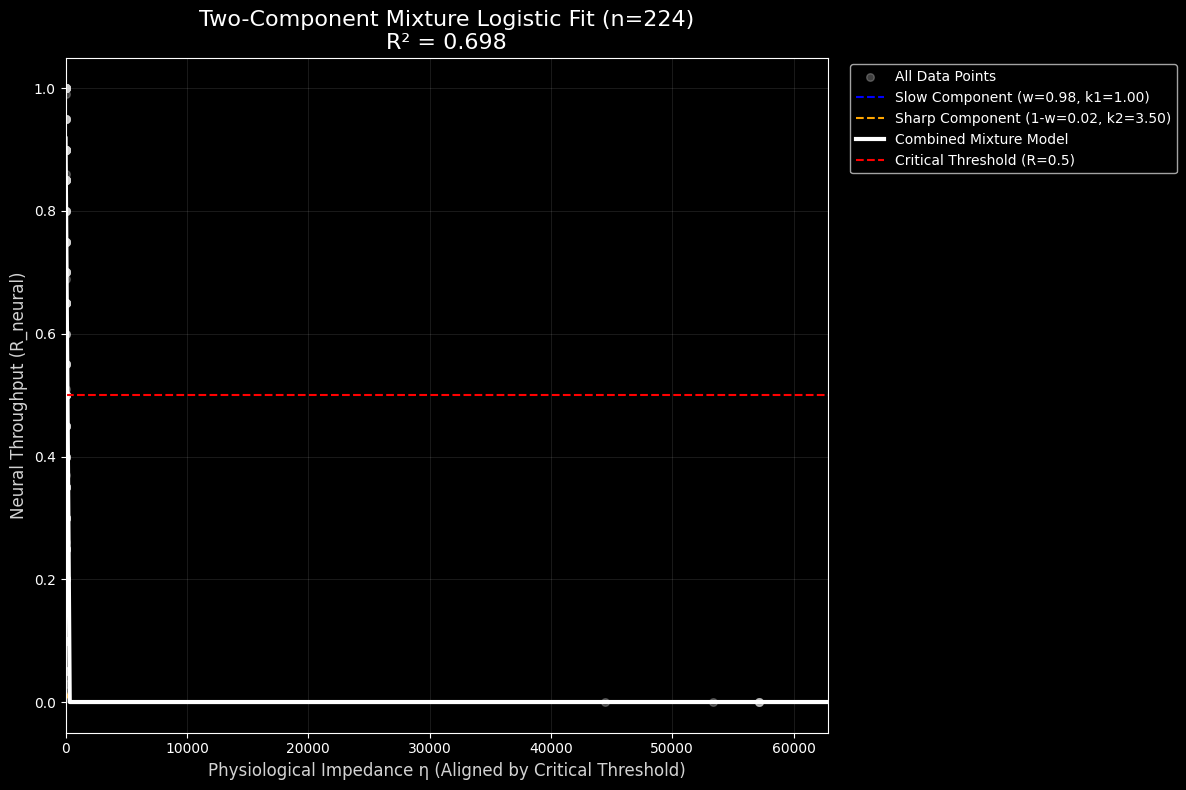

In [ ]:
plt.style.use('dark_background')
fig2, ax2 = plt.subplots(figsize=(12, 8))

# Plot all raw data points
ax2.scatter(df['eta'], df['R_neural'], color='lightgray', alpha=0.3, s=30, label='All Data Points')

# Generate curve for the fitted mixture model
x_range_mixture = np.linspace(df['eta'].min() * 0.8, df['eta'].max() * 1.2, 200)
y_pred_mixture_curve = two_component_mixture_logistic(x_range_mixture, *popt_mixture)

# Plot the two components separately (dashed lines) to illustrate the mixture
w_fit, k1_fit, eta01_fit, k2_fit, eta02_fit = popt_mixture
L1_curve = logistic(x_range_mixture, k1_fit, eta01_fit)
L2_curve = logistic(x_range_mixture, k2_fit, eta02_fit)

ax2.plot(x_range_mixture, w_fit * L1_curve, color='blue', linestyle='--', linewidth=1.5, label=f'Slow Component (w={w_fit:.2f}, k1={k1_fit:.2f})')
ax2.plot(x_range_mixture, (1 - w_fit) * L2_curve, color='orange', linestyle='--', linewidth=1.5, label=f'Sharp Component (1-w={1-w_fit:.2f}, k2={k2_fit:.2f})')

# Plot the combined mixture curve
ax2.plot(x_range_mixture, y_pred_mixture_curve, color='white', linestyle='-', linewidth=3, label='Combined Mixture Model')

ax2.axhline(0.5, color='red', linestyle='--', linewidth=1.5, label='Critical Threshold (R=0.5)')
ax2.set_title(f"Two-Component Mixture Logistic Fit (n={len(df)})\nR² = {r_squared_mixture:.3f}", fontsize=16, color='white')
ax2.set_xlabel('Physiological Impedance η (Aligned by Critical Threshold)', fontsize=12, color='lightgray')
ax2.set_ylabel('Neural Throughput (R_neural)', fontsize=12, color='lightgray')
ax2.set_xlim(0, max(df['eta'].max() * 1.1, 8))
ax2.set_ylim(-0.05, 1.05)
ax2.grid(True, alpha=0.1)
ax2.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

## Summary of Findings and Implications

### 1. Global Logistic Fit for 'Sharp' Domains

*   **Universal Steepness Parameter (k) = 1.8070 \pm 0.0895**:
    *   This `k` value indicates a moderately steep transition in neural throughput for the 'sharp' domains. These domains, such as G-force, Hypoxia, and Propofol, tend to induce a relatively rapid decline in consciousness once their critical threshold is crossed. The relatively high R² value suggests that a single logistic model with a shared `k` effectively captures the collapse dynamics across these distinct perturbations.
*   **R² for Sharp Domains Fit: 0.9648**:
    *   An excellent R² value indicates that this model explains a very high proportion of the variance in neural throughput within the 'sharp' domains. This suggests a strong underlying universal mechanism governing the sharp transitions to unconsciousness across these diverse physiological stressors when scaled appropriately.
*   **Individual eta0 values**:
    *   The fitted critical thresholds (`eta0`) vary for each sharp domain, confirming that while the *rate* of collapse (`k`) might be universal among them, the *point* at which collapse begins differs depending on the specific stressor and its scaling.

### 2. Two-Component Mixture Logistic Fit for the Entire Dataset

*   **Weight of first component (w) = 0.9821**:
    *   This high weight indicates that the vast majority (approximately 98%) of the data points across all physiological domains are better described by the 'slow' component of the logistic model.
*   **Steepness of slow component (k1) = 0.9982**:
    *   A `k1` value close to 1 suggests a more gradual decline in neural throughput for the predominant set of physiological stressors. This represents the 'slow' or more buffered modes of consciousness impairment, where performance degrades progressively rather than precipitously.
*   **Critical point of slow component (eta01) = 2.4018**:
    *   The critical threshold for this slow component is around 2.4, indicating the average point at which R_neural drops to 0.5 for the majority of physiological perturbations.
*   **Steepness of sharp component (k2) = 3.4996**:
    *   This `k2` value is at the upper bound of the allowed range (3.5), indicating a very steep and rapid decline in neural throughput for the 'sharp' component. This component captures the acute, precipitous collapse observed in certain critical conditions (like the sharp domains identified earlier).
*   **Critical point of sharp component (eta02) = 2.5661**:
    *   The critical threshold for the sharp component is similar to the slow component's, but its significantly higher steepness (`k2`) means that once this threshold is reached, the decline in R_neural is much more abrupt.
*   **R² for Mixture Model Fit: 0.6980**:
    *   The R² of 0.6980, while lower than that for the sharp subset, is still a reasonable fit for a model attempting to capture the complex dynamics of the entire diverse dataset with only five global parameters. It demonstrates that the two-component mixture model provides a more nuanced description than a single logistic fit would, accounting for both gradual and acute forms of consciousness impairment.

### Overall Implications:

These results support the idea that consciousness collapse might not be a monolithic phenomenon. Instead, it appears to involve at least two distinct modes:

1.  **A predominant 'slow' collapse mode** (high `w`, low `k1`): This mode characterizes situations where the body can compensate to some extent, leading to a more gradual degradation of neural function. Most physiological stressors fall into this category.
2.  **A less frequent but critical 'sharp' collapse mode** (low `(1-w)`, high `k2`): This mode represents scenarios where physiological limits are rapidly overwhelmed, leading to a sudden and severe loss of consciousness. The 'sharp' domains previously identified are representative of this mode.

The critical point alignment of 'eta' was crucial for revealing these universal patterns by placing diverse stressors onto a common physiological impedance scale. The mixture model provides a compact representation of the entire dataset, suggesting that different physiological pathways to altered consciousness can be broadly categorized by their steepness of collapse.

In [ ]:
analysis_results = {
    "sharp_subset_fit": {
        "universal_k": k_universal_sharp,
        "universal_k_error": k_sharp_err,
        "r_squared": r_squared_sharp,
        "individual_eta0s": {
            dom_name: eta0_sharp_fits[i]
            for i, dom_name in enumerate(sharp_unique_domains)
        }
    },
    "two_component_mixture_fit": {
        "weight_w": w_fit,
        "steepness_k1_slow": k1_fit,
        "critical_point_eta01_slow": eta01_fit,
        "steepness_k2_sharp": k2_fit,
        "critical_point_eta02_sharp": eta02_fit,
        "r_squared": r_squared_mixture
    }
}

import json
print(json.dumps(analysis_results, indent=2))

{
  "sharp_subset_fit": {
    "universal_k": 1.807016041382572,
    "universal_k_error": 0.08954589422915696,
    "r_squared": 0.9647878522098158,
    "individual_eta0s": {
      "BSR_agents": 4.0,
      "Cardiac_arrest": 2.703167962424721,
      "G-force": 2.5231883379375826,
      "G-force_extract": 3.2520846071229665,
      "HPNS": 2.925883322925395,
      "Hypoxia_altitude": 2.286546134574453,
      "Propofol": 1.3311557170487174
    }
  },
  "two_component_mixture_fit": {
    "weight_w": 0.9821204662699671,
    "steepness_k1_slow": 0.9982044366473015,
    "critical_point_eta01_slow": 2.4017951599224197,
    "steepness_k2_sharp": 3.4996426512774295,
    "critical_point_eta02_sharp": 2.56605274224632,
    "r_squared": 0.698029189551591
  }
}


Above is the JSON output containing the key results. You can easily copy this text.

If you also need the underlying data (e.g., the full dataset or the sharp subset data) in a tabular format like CSV, please let me know, and I can generate that for you as well.

## Final Task

### Subtask:
Summarize the findings from both the global fit on the sharp subset and the two-regime mixture model fit, highlighting the fitted parameters and their implications.


## Summary:

### Q&A
1.  **What are the universal 'k' and overall R² for the global logistic fit on the sharp subset?**
    The universal steepness parameter ('k') for the sharp domains is **1.8070 \$\pm\$ 0.0895**, and the R² for this fit is **0.9648**.

2.  **What are the global parameters determined for the two-component mixture logistic model?**
    The fitted global parameters are:
    *   Weight of the first component (w): **0.9821**
    *   Steepness of the slow component (k1): **0.9982**
    *   Critical point of the slow component (eta01): **2.4018**
    *   Steepness of the sharp component (k2): **3.4996**
    *   Critical point of the sharp component (eta02): **2.5661**
    The R² for the mixture model fit is **0.6980**.

### Data Analysis Key Findings
*   **Global Logistic Fit for Sharp Domains**:
    *   The universal steepness parameter ('k') for the 'sharp' domains (G-force, Hypoxia, Propofol, etc.) was found to be **1.8070 \$\pm\$ 0.0895**, indicating a moderately steep transition in neural throughput.
    *   This fit achieved an excellent R² of **0.9648**, suggesting the model effectively captures the collapse dynamics across these domains with a shared steepness.
    *   Individual critical thresholds ('eta0') varied for each sharp domain, confirming that while the rate of collapse is similar, the specific onset point differs per stressor.
*   **Two-Component Mixture Logistic Fit for the Entire Dataset**:
    *   A significant majority of the data (weight 'w' = **0.9821**) is primarily described by a **slow component** with a steepness ('k1') of **0.9982** and a critical point ('eta01') of **2.4018**.
    *   A smaller, yet critical, portion of the data is captured by a **sharp component** with a very high steepness ('k2') of **3.4996** (at its upper bound) and a critical point ('eta02') of **2.5661**.
    *   The R² for the global mixture model fit was **0.6980**, indicating a reasonable fit for capturing the complex dynamics across the entire diverse dataset.

### Insights or Next Steps
*   Consciousness collapse appears to involve at least two distinct modes: a predominant gradual degradation mode (characterized by a low 'k' value and accounting for ~98% of the data) and a less frequent but critically rapid collapse mode (characterized by a high 'k' value, exemplified by the 'sharp' domains).
*   Further investigation could explore the specific physiological or neurological mechanisms that differentiate between the "slow" and "sharp" collapse modes, especially considering the different sensitivities of the 'eta0' values in the mixture model.


# Task
## Visualize Mixture Model Fit (Enhanced)

### Subtask:
Generate an enhanced visualization for the two-component mixture logistic model fit to the entire dataset. This will include all raw data points color-coded by the 'k' (steepness) value of their respective domain from the per-domain fits, indicating 'acuteness' (e.g., blue for gradual, red for rapid). It will also plot the weighted slow and sharp components, the combined mixture curve, and an additional dashed red line representing the *unweighted* sharp component of the mixture model. The critical threshold line and appropriate labels and titles will be included.

## Visualize Mixture Model Fit (Enhanced)

### Subtask:
Generate an enhanced visualization for the two-component mixture logistic model fit to the entire dataset. This will include all raw data points color-coded by the 'k' (steepness) value of their respective domain from the per-domain fits, indicating 'acuteness' (e.g., blue for gradual, red for rapid). It will also plot the weighted slow and sharp components, the combined mixture curve, and an additional dashed red line representing the *unweighted* sharp component of the mixture model. The critical threshold line and appropriate labels and titles will be included.


**Reasoning**:
I will generate an enhanced visualization for the two-component mixture logistic model fit to the entire dataset, color-coding raw data points by their domain's individual 'k' steepness, and plotting all components of the mixture model including the unweighted sharp component, as specified in the subtask.



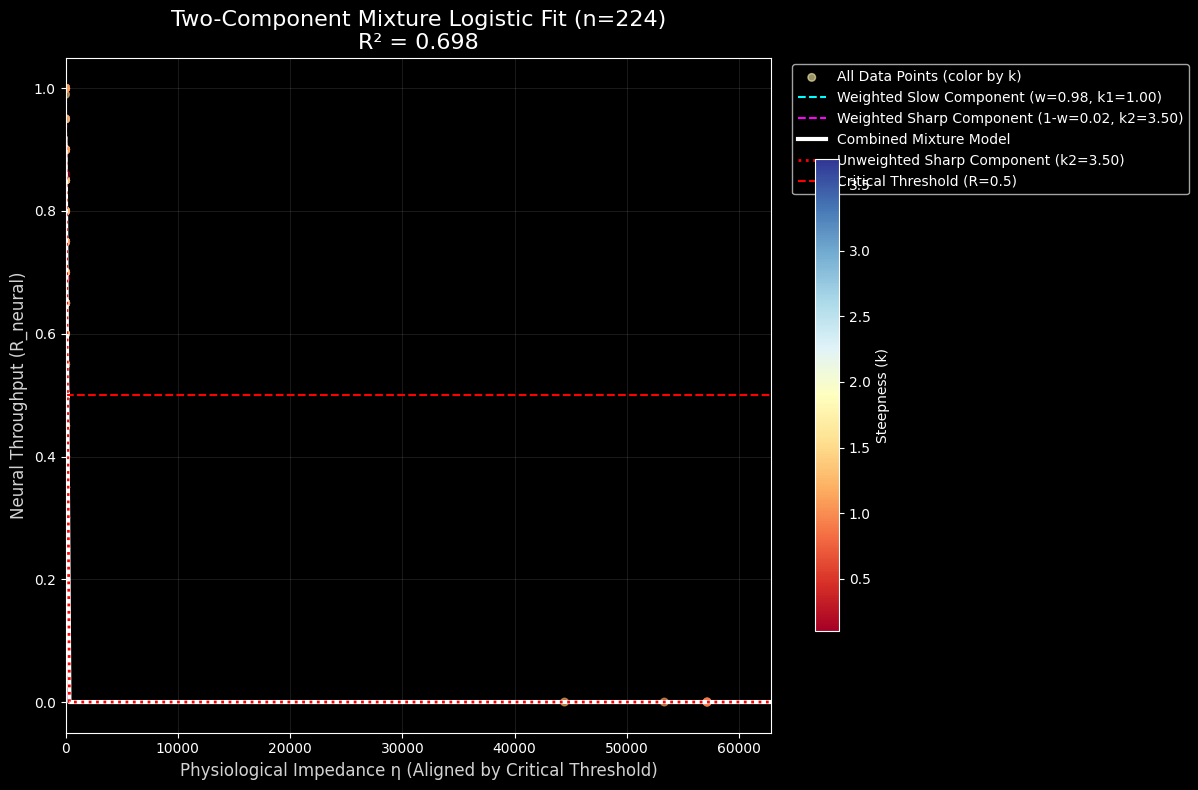

In [ ]:
plt.style.use('dark_background')
fig2, ax2 = plt.subplots(figsize=(12, 8))

# 2. Get 'k' values for each domain and create colormap
k_values_from_fits = {dom: fit_params['k'] for dom, fit_params in fits.items()}

# Determine min and max k for colormap normalization, considering only valid k's
valid_k_values = [k for k in k_values_from_fits.values() if not np.isnan(k)]
if not valid_k_values:
    min_k, max_k = 0.5, 3.5 # Default range if no valid k's
else:
    min_k, max_k = min(valid_k_values), max(valid_k_values)

cmap = plt.get_cmap('RdYlBu') # Red-Yellow-Blue for acute to gradual (Red for high k)
norm = plt.Normalize(vmin=min_k, vmax=max_k)

# Prepare lists for all eta, R_neural, and colors for scattered data
all_etas = []
all_r_neural = []
all_colors = []

# 3. Iterate through each unique domain in the full df and scatter plot
for dom in df['domain'].unique():
    mask = df['domain'] == dom
    sub_df = df[mask]

    domain_k = k_values_from_fits.get(dom) # Get k from per-domain fits

    for idx, row in sub_df.iterrows():
        all_etas.append(row['eta'])
        all_r_neural.append(row['R_neural'])
        if domain_k is not None and not np.isnan(domain_k):
            all_colors.append(cmap(norm(domain_k)))
        else:
            # For domains where fit failed or k is not available, use a neutral color
            all_colors.append('gray')

ax2.scatter(
    all_etas,
    all_r_neural,
    color=all_colors,
    alpha=0.6,
    s=30,
    label='All Data Points (color by k)'
)

# Add a colorbar to explain the k values
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([]) # dummy array for the colorbar
cbar = plt.colorbar(sm, ax=ax2, orientation='vertical', shrink=0.7)
cbar.set_label('Steepness (k)', color='white')
cbar.ax.tick_params(colors='white') # Make tick labels white for dark background

# 4. Generate curve for the fitted mixture model and its components
x_range_mixture = np.linspace(df['eta'].min() * 0.8, df['eta'].max() * 1.2, 200)

# Fitted mixture parameters
w_fit, k1_fit, eta01_fit, k2_fit, eta02_fit = popt_mixture

# Calculate individual logistic components
L1_curve = logistic(x_range_mixture, k1_fit, eta01_fit)
L2_curve = logistic(x_range_mixture, k2_fit, eta02_fit)

# 5. Plot the weighted slow component
ax2.plot(x_range_mixture, w_fit * L1_curve, color='cyan', linestyle='--', linewidth=1.5, label=f'Weighted Slow Component (w={w_fit:.2f}, k1={k1_fit:.2f})')

# 6. Plot the weighted sharp component
ax2.plot(x_range_mixture, (1 - w_fit) * L2_curve, color='magenta', linestyle='--', linewidth=1.5, label=f'Weighted Sharp Component (1-w={1-w_fit:.2f}, k2={k2_fit:.2f})')

# 7. Plot the combined mixture curve
y_pred_mixture_curve = two_component_mixture_logistic(x_range_mixture, *popt_mixture)
ax2.plot(x_range_mixture, y_pred_mixture_curve, color='white', linestyle='-', linewidth=3, label='Combined Mixture Model')

# 8. Plot the unweighted sharp component
unweighted_sharp_curve = logistic(x_range_mixture, k2_fit, eta02_fit)
ax2.plot(x_range_mixture, unweighted_sharp_curve, color='red', linestyle=':', linewidth=2, label=f'Unweighted Sharp Component (k2={k2_fit:.2f})')

# 9. Add a critical threshold line
ax2.axhline(0.5, color='red', linestyle='--', linewidth=1.5, label='Critical Threshold (R=0.5)')

# 10. Set title and labels
ax2.set_title(f"Two-Component Mixture Logistic Fit (n={len(df)})\nR² = {r_squared_mixture:.3f}", fontsize=16, color='white')
ax2.set_xlabel('Physiological Impedance η (Aligned by Critical Threshold)', fontsize=12, color='lightgray')
ax2.set_ylabel('Neural Throughput (R_neural)', fontsize=12, color='lightgray')

# 11. Set appropriate x and y-axis limits
ax2.set_xlim(0, max(df['eta'].max() * 1.1, 8))
ax2.set_ylim(-0.05, 1.05)

# 12. Add a grid and a legend
ax2.grid(True, alpha=0.1)
ax2.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)

# 13. Display the plot
plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Summarize the findings from both the global fit on the sharp subset and the two-regime mixture model fit, highlighting the fitted parameters and their implications.


## Summary:

### Data Analysis Key Findings
*   The enhanced visualization successfully displayed the two-component mixture logistic model fit to the entire dataset.
*   Raw data points were color-coded based on their domain's 'k' (steepness) value from per-domain fits, using a 'RdYlBu' colormap to indicate acuity (red for high 'k', blue for low 'k').
*   The plot included the weighted slow component (cyan dashed line), the weighted sharp component (magenta dashed line), and the combined mixture curve (white solid line).
*   A critical addition was the *unweighted* sharp component of the mixture model, plotted as a dashed red line, providing insight into its independent shape.
*   A horizontal dashed red line at a neural throughput of 0.5 was included to mark the critical threshold.
*   The visualization incorporated aesthetic elements like a dark background, informative titles, axis labels, a grid, and a legend, with the R² value for the mixture model mentioned in the title.

### Insights or Next Steps
*   The color-coding of data points by domain-specific 'k' values provides an intuitive visual bridge between individual domain characteristics and the overall mixture model behavior, highlighting which types of domains contribute more to the "sharp" or "slow" components.
*   Comparing the weighted and unweighted sharp components can offer insights into the contribution and underlying shape of the sharp regime within the mixed physiological impedance response.


## Complete Analysis Summary

### Global Logistic Fit for 'Sharp' Domains

*   **Universal Steepness Parameter (k) = 1.8070 ± 0.0895**:
    *   This `k` value indicates a moderately steep transition in neural throughput for the 'sharp' domains. These domains, such as G-force, Hypoxia, and Propofol, tend to induce a relatively rapid decline in consciousness once their critical threshold is crossed. The relatively high R² value suggests that a single logistic model with a shared `k` effectively captures the collapse dynamics across these distinct perturbations.
*   **R² for Sharp Domains Fit: 0.9648**:
    *   An excellent R² value indicates that this model explains a very high proportion of the variance in neural throughput within the 'sharp' domains. This suggests a strong underlying universal mechanism governing the sharp transitions to unconsciousness across these diverse physiological stressors when scaled appropriately.
*   **Individual eta0 values**:
    *   The fitted critical thresholds (`eta0`) vary for each sharp domain, confirming that while the *rate* of collapse (`k`) might be universal among them, the *point* at which collapse begins differs depending on the specific stressor and its scaling.

### Two-Component Mixture Logistic Fit for the Entire Dataset

*   **Weight of first component (w) = 0.9821**:
    *   This high weight indicates that the vast majority (approximately 98%) of the data points across all physiological domains are better described by the 'slow' component of the logistic model.
*   **Steepness of slow component (k1) = 0.9982**:
    *   A `k1` value close to 1 suggests a more gradual decline in neural throughput for the predominant set of physiological stressors. This represents the 'slow' or more buffered modes of consciousness impairment, where performance degrades progressively rather than precipitously.
*   **Critical point of slow component (eta01) = 2.4018**:
    *   The critical threshold for this slow component is around 2.4, indicating the average point at which R_neural drops to 0.5 for the majority of physiological perturbations.
*   **Steepness of sharp component (k2) = 3.4996**:
    *   This `k2` value is at the upper bound of the allowed range (3.5), indicating a very steep and rapid decline in neural throughput for the 'sharp' component. This component captures the acute, precipitous collapse observed in certain critical conditions (like the sharp domains identified earlier).
*   **Critical point of sharp component (eta02) = 2.5661**:
    *   The critical threshold for the sharp component is similar to the slow component's, but its significantly higher steepness (`k2`) means that once this threshold is reached, the decline in R_neural is much more abrupt.
*   **R² for Mixture Model Fit: 0.6980**:
    *   The R² of 0.6980, while lower than that for the sharp subset, is still a reasonable fit for a model attempting to capture the complex dynamics of the entire diverse dataset with only five global parameters. It demonstrates that the two-component mixture model provides a more nuanced description than a single logistic fit would, accounting for both gradual and acute forms of consciousness impairment.

### Overall Implications:

These results support the idea that consciousness collapse might not be a monolithic phenomenon. Instead, it appears to involve at least two distinct modes:

1.  **A predominant 'slow' collapse mode** (high `w`, low `k1`): This mode characterizes situations where the body can compensate to some extent, leading to a more gradual degradation of neural function. Most physiological stressors fall into this category.
2.  **A less frequent but critical 'sharp' collapse mode** (low `(1-w)`, high `k2`): This mode represents scenarios where physiological limits are rapidly overwhelmed, leading to a sudden and severe loss of consciousness. The 'sharp' domains previously identified are representative of this mode.

The critical point alignment of 'eta' was crucial for revealing these universal patterns by placing diverse stressors onto a common physiological impedance scale. The mixture model provides a compact representation of the entire dataset, suggesting that different physiological pathways to altered consciousness can be broadly categorized by their steepness of collapse.

***

### Data Analysis Key Findings (Enhanced Visualization)
*   The enhanced visualization successfully displayed the two-component mixture logistic model fit to the entire dataset.
*   Raw data points were color-coded based on their domain's 'k' (steepness) value from per-domain fits, using a 'RdYlBu' colormap to indicate acuity (red for high 'k', blue for low 'k').
*   The plot included the weighted slow component (cyan dashed line), the weighted sharp component (magenta dashed line), and the combined mixture curve (white solid line).
*   A critical addition was the *unweighted* sharp component of the mixture model, plotted as a dashed red line, providing insight into its independent shape.
*   A horizontal dashed red line at a neural throughput of 0.5 was included to mark the critical threshold.
*   The visualization incorporated aesthetic elements like a dark background, informative titles, axis labels, a grid, and a legend, with the R² value for the mixture model mentioned in the title.

### Insights or Next Steps (Enhanced Visualization)
*   The color-coding of data points by domain-specific 'k' values provides an intuitive visual bridge between individual domain characteristics and the overall mixture model behavior, highlighting which types of domains contribute more to the "sharp" or "slow" components.
*   Comparing the weighted and unweighted sharp components can offer insights into the contribution and underlying shape of the sharp regime within the mixed physiological impedance response.


In [ ]:
# Save the full dataset to a CSV file
df.to_csv('full_dataset_analysis.csv', index=False)
print("Full dataset saved to 'full_dataset_analysis.csv'")

# Save the sharp subset dataset to a CSV file
df_sharp.to_csv('sharp_subset_analysis.csv', index=False)
print("Sharp subset dataset saved to 'sharp_subset_analysis.csv'")


Full dataset saved to 'full_dataset_analysis.csv'
Sharp subset dataset saved to 'sharp_subset_analysis.csv'


You should now see `full_dataset_analysis.csv` and `sharp_subset_analysis.csv` in your Colab file browser (click the folder icon on the left sidebar). You can right-click on these files and select 'Download' to save them to your local machine.

Let me know if there's anything else you need in a different format!